<a href="https://colab.research.google.com/github/srodriguez5500/Unsupervised-Learning-Trade-Ahead/blob/main/Unsupervised_Learning_Trade_Ahead_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning: Trade & Ahead**

## **Problem Statement**

### **Context**

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task.
**By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.**


### **Objective**

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### **Data Dictionary**

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## **Importing necessary libraries and data**

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.3.2 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 yellowbrick==1.5 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


#To scale the data using z-score
from sklearn.preprocessing import StandardScaler


#To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#To compute distances in hiearchical clustering
from scipy.spatial.distance import pdist

#To perform KMeans clustering and compute distances
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#To compute and visualize silhouette score and the elbow curve
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#For visualization in a reduced dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Import Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 7: Kmeans_HIeararch_clust_PCA/stock_data.csv')

## **Data Overview**

- Observations
- Sanity checks

###**Check 10 random rows from the dataset.**

In [ ]:
#Viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000,-15.478,2.924,205,70,830000000,-14454000000,-35.550,406582278.500,93.089,1.786
125,FB,Facebook,Information Technology,Internet Software & Services,104.660,16.224,1.321,8,958,592000000,3669000000,1.310,2800763359.000,79.893,5.884
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.030,7.579,1.163,15,47,21818000,248710000,1.520,163625000.000,26.336,-1.269
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410,10.661,0.806,17,129,160383000,636056000,3.280,491391569.000,24.070,-2.257
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610,0.865,1.590,32,64,-588000000,-7829000000,-10.230,765298142.700,93.089,3.345
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516,-8.699,1.479,142,27,159000000,1293000000,2.970,435353535.400,17.682,-3.838
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130,-21.254,2.365,2,201,523803000,85171000,0.560,152091071.400,93.089,9.568
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040,-5.102,1.966,4,189,7786000000,-671000000,-0.790,849367088.600,93.089,17.346
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.620,3.654,1.160,20,99,2288000000,2297000000,5.140,446887159.500,10.432,-0.376
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480,7.067,1.581,12,67,412000000,968100000,2.260,428362831.900,14.814,4.219


- The dataset imported successfully.

###**Check shape of the dataset**

In [ ]:
data.shape

(340, 15)

- There are 340 rows and 15 columns in the dataset.

###**Check the feature datatypes**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- Most attributes are numerical, with the exception of 4 categorical attributes that include:
  - Ticker Symbol
  - Security
  - GICS Sector
  - GICS Sub Industry

###**Check for missing values and duplicates**

In [ ]:
#Check for missing values
data.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


In [ ]:
#Check for duplicates
data.duplicated().sum()

0

- There are no missing values in the dataset or duplicated rows.

###**Check the statistical summary of the numerical features**

In [ ]:
#Create a subset dataframe of the original, only containing numerical attributes
numeric_feat = data.select_dtypes(include='number')

In [ ]:
numeric_feat.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.000,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000
Net Income,340.000,1494384602.941,3940150279.328,-23528000000.000,352301250.000,707336000.000,1899000000.000,24442000000.000
Earnings Per Share,340.000,2.777,6.588,-61.200,1.558,2.895,4.620,50.090
Estimated Shares Outstanding,340.000,577028337.754,845849595.418,27672156.860,158848216.100,309675137.800,573117457.325,6159292035.000
P/E Ratio,340.000,32.613,44.349,2.935,15.045,20.820,31.765,528.039


- `Current Price` has a vast range of possible values.
- We see negative values in the following features:
  - `Price Change`, `Net Cash Flow`, `Net Income`, `Earnings Per Share`, `P/B Ratio`
  - These negative values are appropriate, given their respective attributes.
- Given the spread of the data, there appears to be many attributes that may have outliers including:
  - `ROE`, `Cash Ratio`, `P/E Ratio`, `P/B Ratio` and `Estimated Shares Outstanding`
- This data will be explored more thoroughly in the univariate analysis portion.

###**Check the unique values of all categorical variables**

In [ ]:
#Show value count and proportion of each unique entry in every categorical feature
cat_cols = data.select_dtypes(include = ['object']).columns

for col in cat_cols:
  feature_count = data[col].value_counts()
  feature_proportion = data[col].value_counts(normalize=True)
  print(pd.merge(feature_count, feature_proportion, on=col, how='inner'))
  print('-'*100)

                         count  proportion
company_name                              
American Airlines Group      1       0.003
NextEra Energy               1       0.003
Nucor Corp.                  1       0.003
Northern Trust Corp.         1       0.003
Norfolk Southern Corp.       1       0.003
...                        ...         ...
Equity Residential           1       0.003
Equinix                      1       0.003
EOG Resources                1       0.003
Eastman Chemical             1       0.003
Zoetis                       1       0.003

[340 rows x 2 columns]
----------------------------------------------------------------------------------------------------
                             count  proportion
gics_sector                                   
Industrials                     53       0.156
Financials                      49       0.144
Health Care                     40       0.118
Consumer Discretionary          40       0.118
Information Technology          33

- `Ticker Symbol` and `Security` are unique entries fror each observation, as expected.
- `Industrials` and `Financials` make up the largest GICS Sectors.
- Although the differences in proportions are minute, the top GICS Sub Industries include:
  - `Oil & Gas Exploration & Production`,
`REITs` and `Industrial Conglomerates `
- The categorical variables will be further analyzed in the univariate section.

###**Clean up column names**
- It is noted that there are spaces and special characters in the attribute names. We will clean this up.
- In addition, We will change the `Security` attribute name to `Company_Name`, for clarity.

In [ ]:
#Create a copy of the original dataset, data
df = data.copy()

#Fixing column names by removing special characters, replacing spaces with underscores and changing to lowercase
df.columns = [c.replace('/', '').replace(' ', '_').replace('Security', 'Company_Name').lower() for c in df.columns]

In [ ]:
#Checking column names
df.head()

,ticker_symbol,company_name,gics_sector,gics_sub_industry,current_price,price_change,volatility,roe,cash_ratio,net_cash_flow,net_income,earnings_per_share,estimated_shares_outstanding,pe_ratio,pb_ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060


## **Exploratory Data Analysis (EDA)**


###**Univariate Analysis**

####**The following function will generate a boxblot and a histogram for any given attribute.**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    #Calculate mean and median for the feature
    mean = data[feature].mean()
    median = data[feature].median()

    # creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # For histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )

    # Add mean to the histogram
    ax_hist2.axvline(
        mean, color="green", linestyle="--", label=f'Mean: {mean:.2f}'
    )

    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label=f'Median: {median:.2f}'
    )

    # Add legend for mean and median
    ax_hist2.legend()

####**Plotting all numerical features in one go**

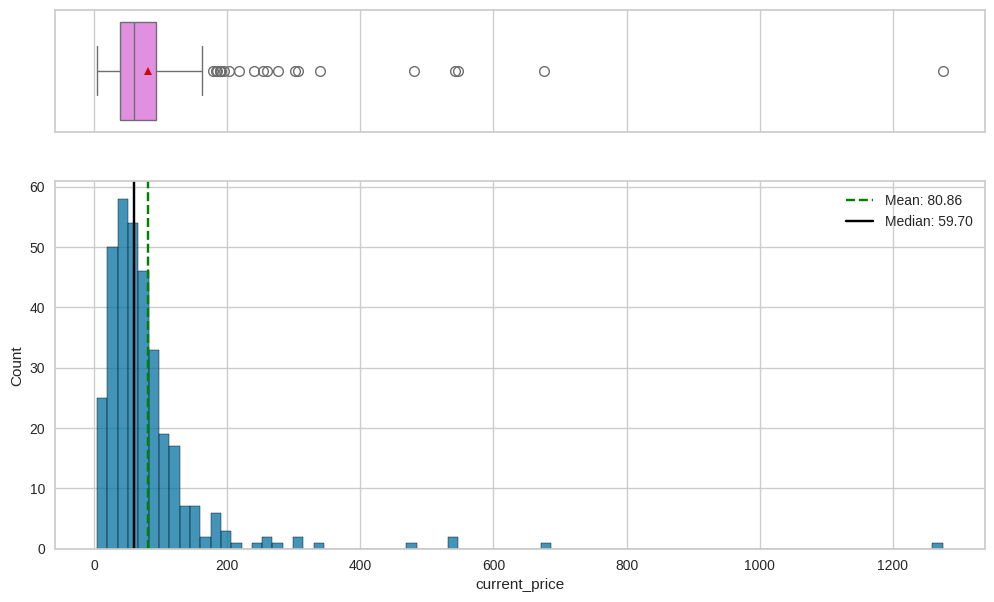

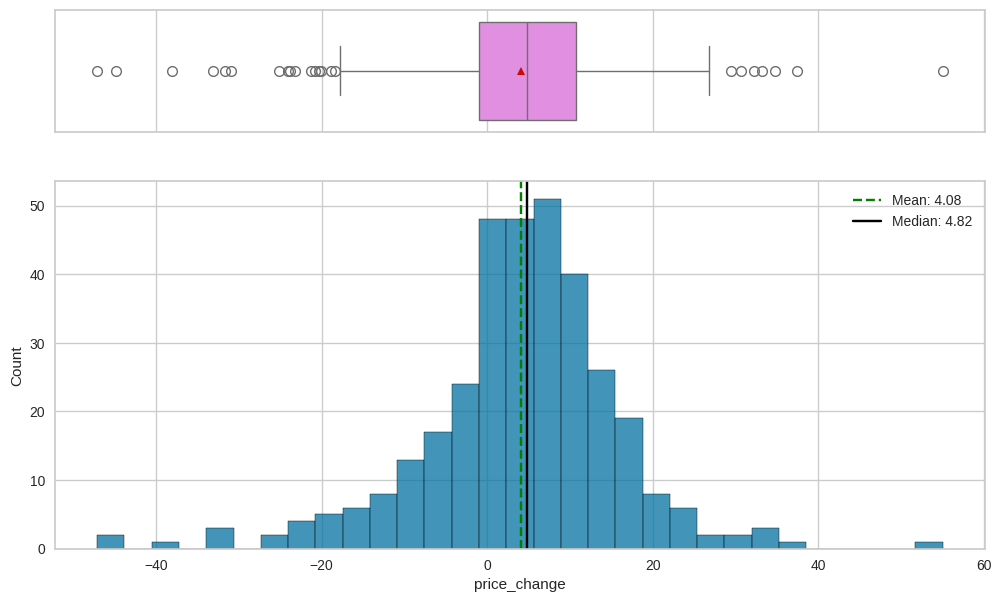

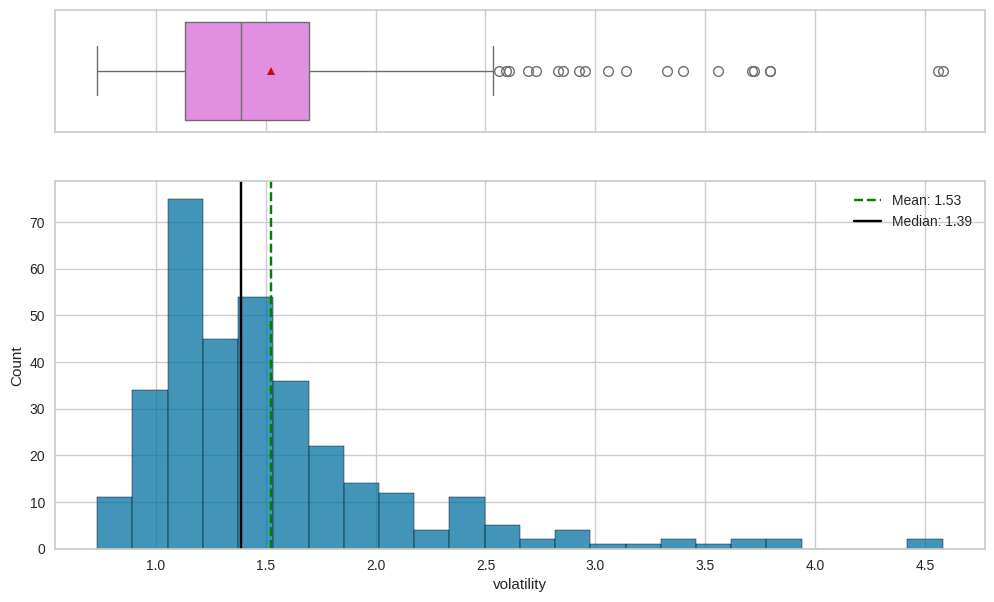

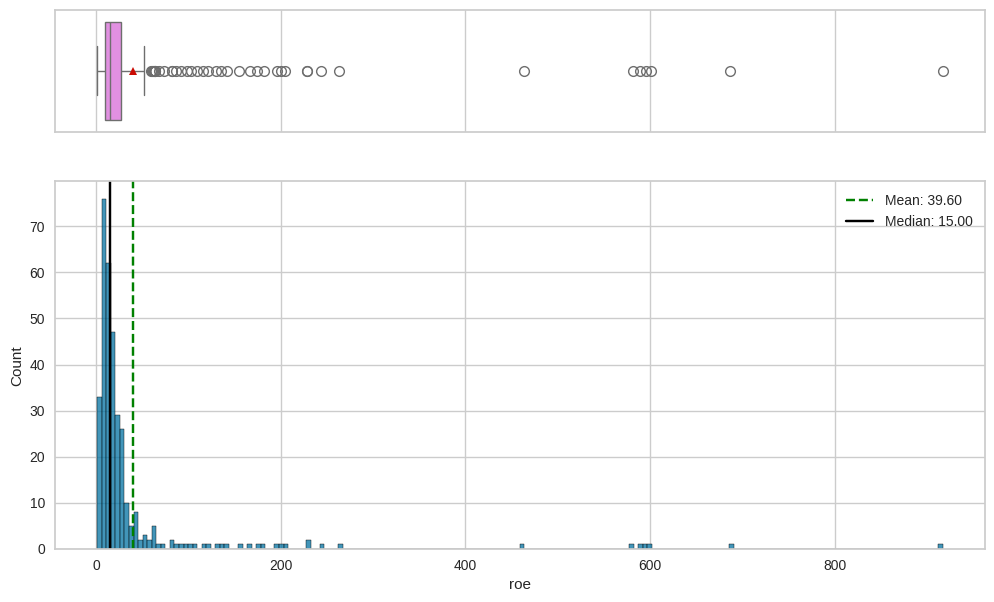

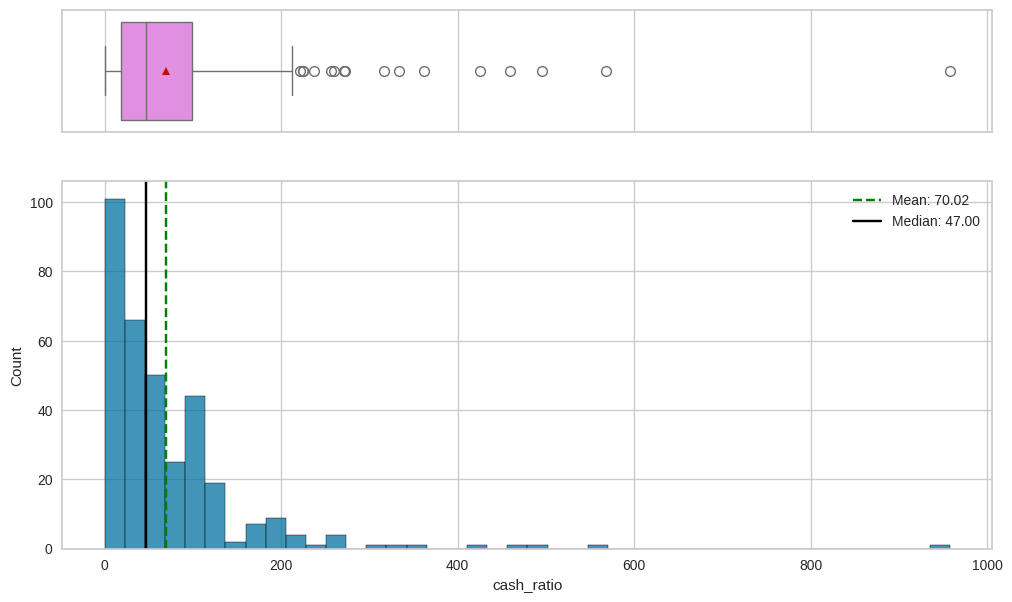

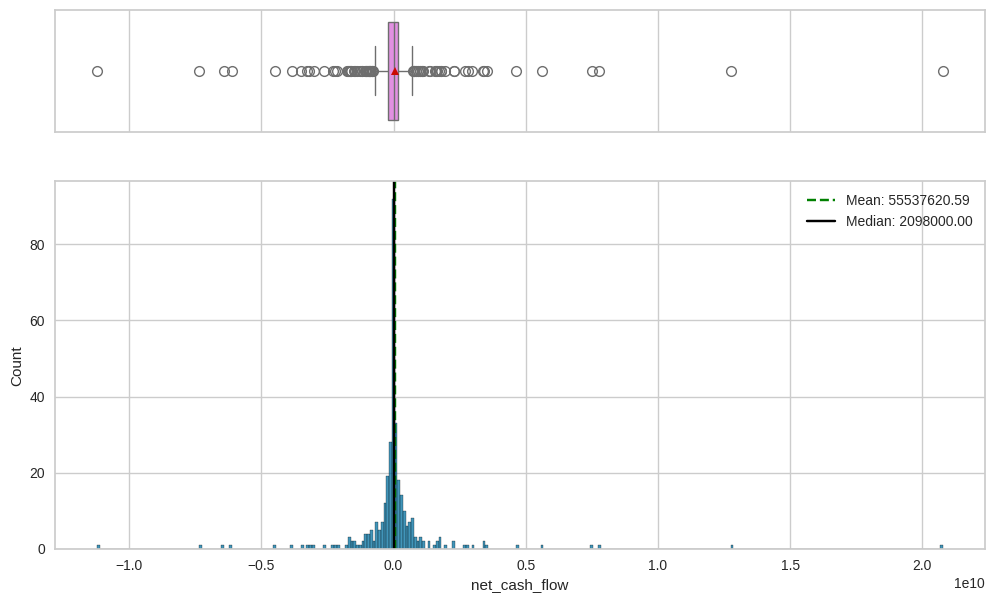

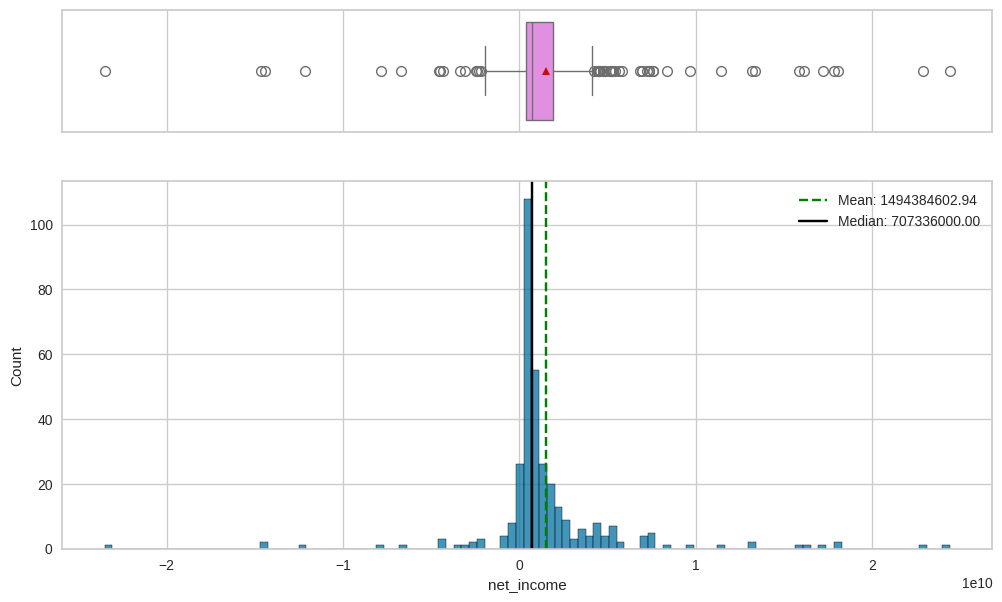

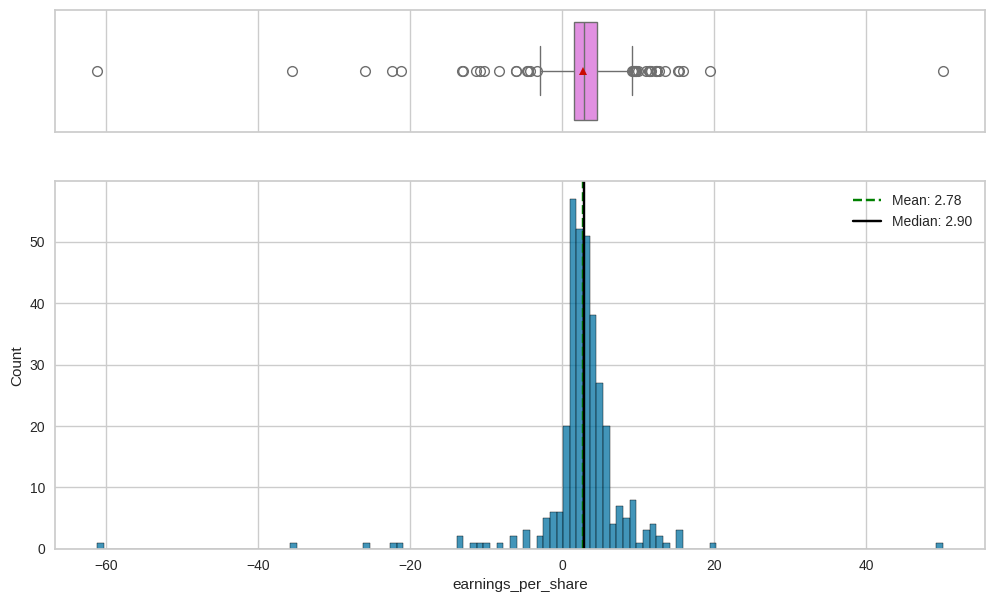

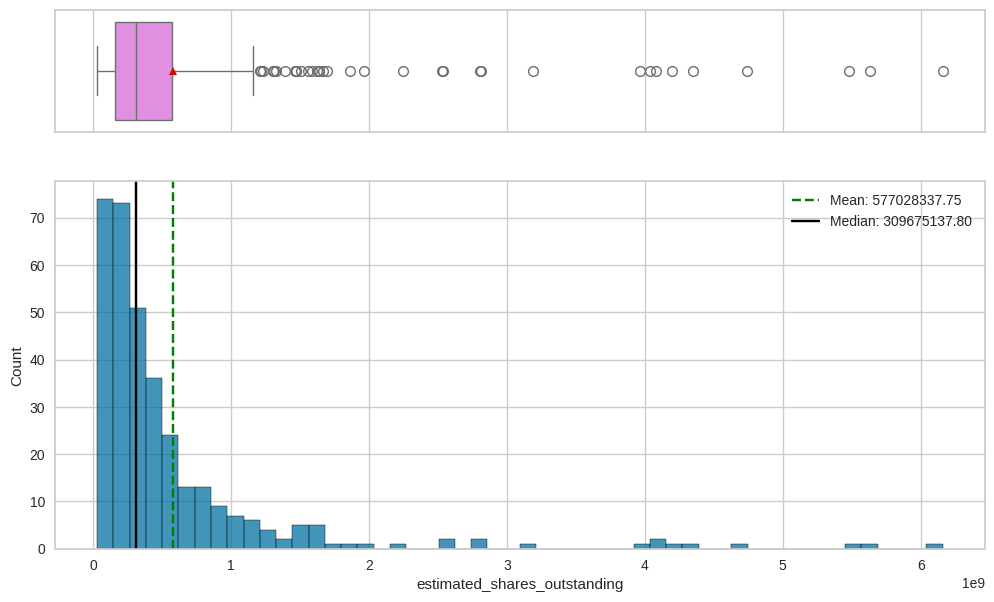

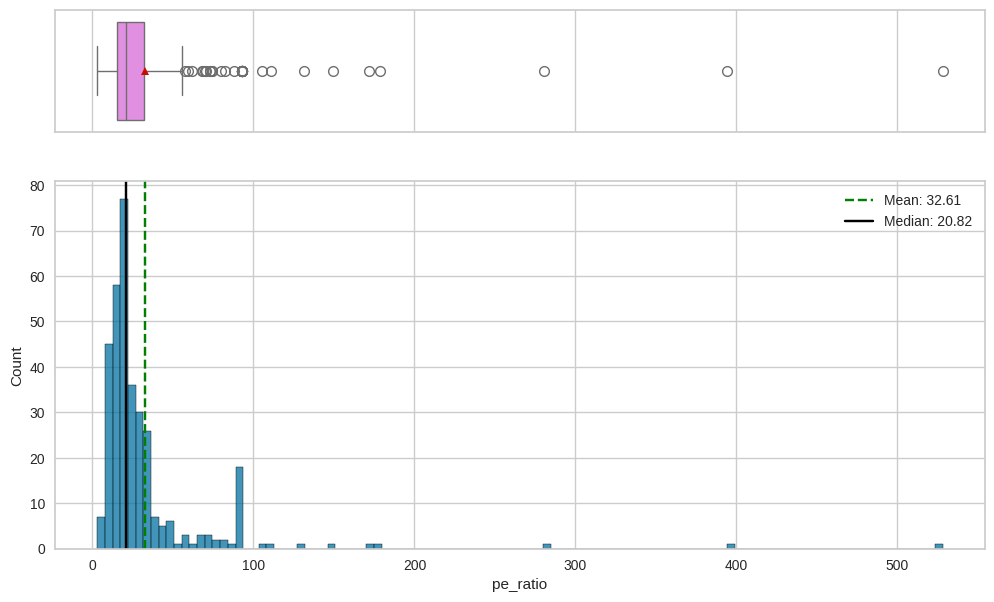

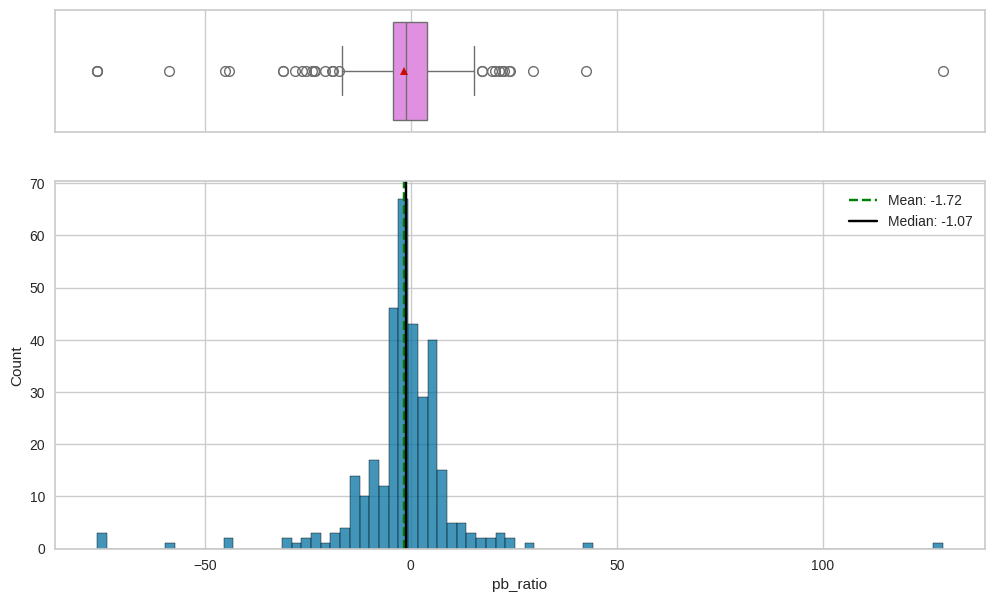

In [ ]:
for feature in df.select_dtypes(include='number'):
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

**Univariate Analysis Observations:**
  - **Distributions that are right skewed:**
    - `current_price` **(Question 1)**: The distribution of stock prices is heavily right skewed, where most current prices are within the $5 - $200 range. Outliers exist on the upper end of the spread, indicating that some current stock prices are very high. The highest stock price is ~ $1,300.
    - `volatility` Is heavily right skewed with outliers in the upper bounds. These extreme values indicate that the price of stock for their respective companies may fluctuate rapidly in a short period.
    - `ROE` is heavily right skewed with extreme outliers in the upper bounds. These extreme values indicate that their respective companies are doing very well in terms of generating income using its shareholder’s equity.
    - `cash_ratio` is also heavily right skewed with outliers in the upper bounds. These high values indicate that their respective companies can adequately cover current liabilities with cash at hand. In addition, these high values can indicate that investment opportunities are not always taken due to the excess amount of cash
    - `net_cash_flow` has extreme values on the upper and lower bounds but is slightly right skewed, indicated by a longer tail on the right side. The distribution is clustered around 0, indicating that most companies have net cash flow values close to 0.
    - `net_income` has extreme values on the upper and lower bounds of the distribution but is slightly right skewed. The distribution is highly concentrated near 0, indicating that most companies have moderate profits/losses.
    - `estimated_shares_outstanding` is heavily right skewed, with all extreme values existing in the upper bound. This indicates there are some companies that have extremely large amounts of estimated outstanding shares which is often not good. Most companies have around 309,675,138 estimated outstanding shares.
    - `pe_ratio` is right skewed, indicating the existence of P/E ratios that are much larger than the rest of the distribution. These larger values may indicate that the stock for these companies is overvalued.

- **Distributions that are left skewed:**
  - `earnings_per_share` has extreme values on both sides, but is left skewed due to a longer tail on the lower bound. It is noted that there are extreme values that are negative, indicating that there are instances when companies are not profiting and can be less likely to pay dividends to shareholders in the future
  
- **Distributions that are approximately normally distributed:**
  - `price_change` is approximately normally distributed and has outliers in the upper and lower ends of the spread. This indicates that the price changes in 13 weeks may be more predictable.
  - `pb_ratio` is also approximately normally distributed. Most P/B ratios are around 0 with the exception of some extreme values in the upper and lower bounds. These extreme values indicate that some companies may have stock prices that are overvalued (high P/B ratios) and some that are undervalued (low P/B ratios).


###**Visualize empirical cumulative distribution function (ECDF) based on the observed values to see the approximation of the CDF.**

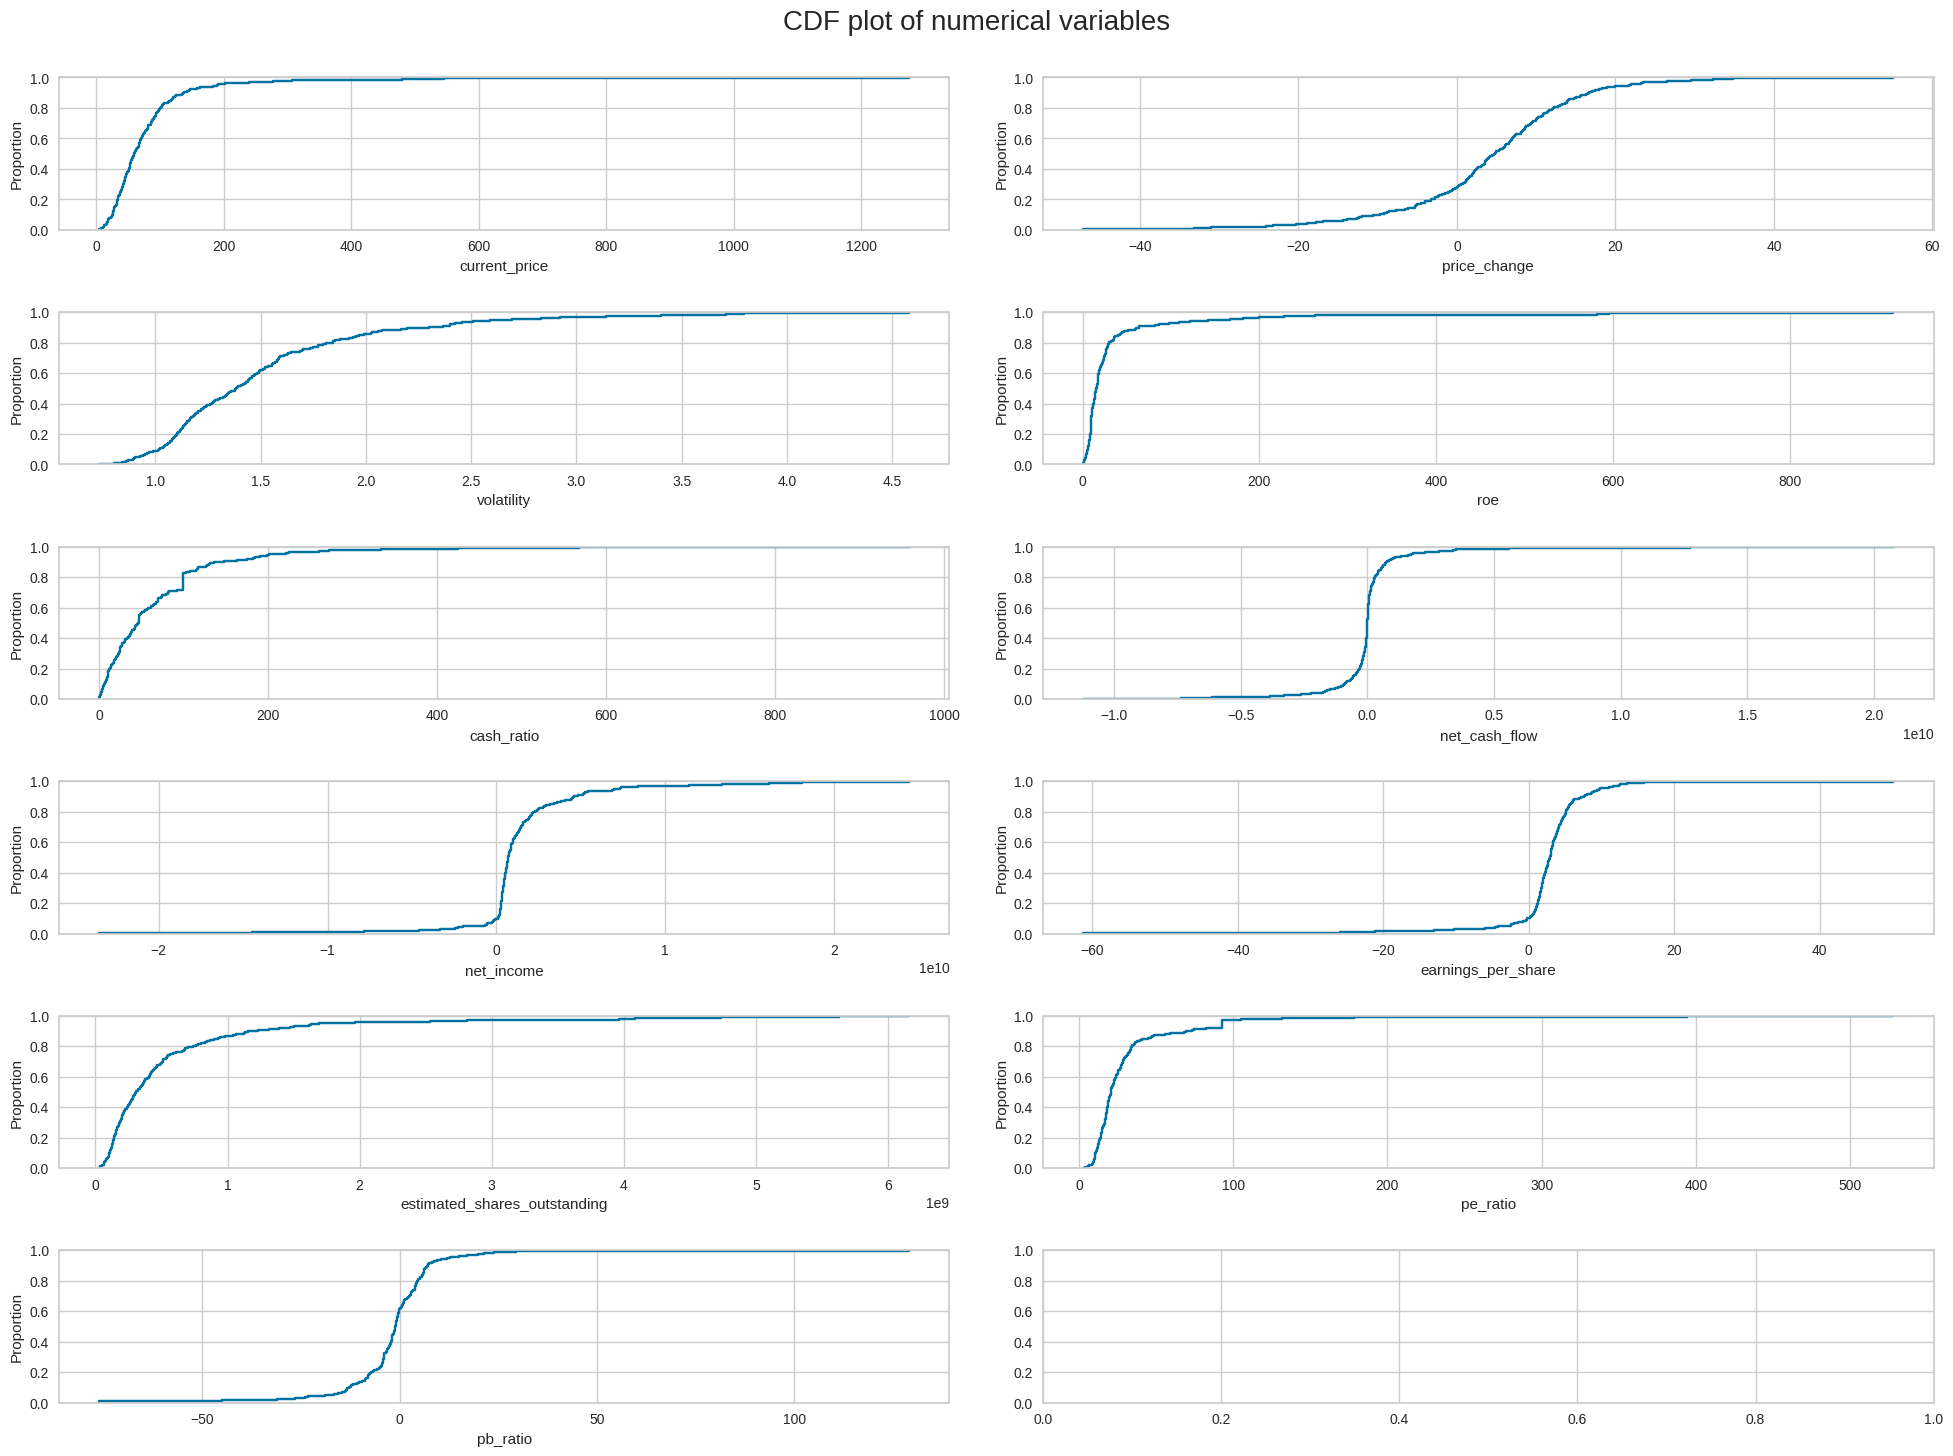

In [ ]:
#Selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

#Create subplots to visualize the cumulative distribution function of numerical variables
fig, axes = plt.subplots(6, 2, figsize=(20, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)

#Track which numerical column to plot from the list 'num_col'
counter = 0
#Loop through rows (6 rows total) of the subplot grid
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]]) #Plot the ECDF for given column on the left
    counter = counter + 1 #Iterate to the next numerical column
    if counter != 11: #Plots leftover numerical columns in the right column
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**ECDF Observations:**
  - 30% of the observations have negative values for `price_change`.
  - 40% of the observations are negative for `net_cash_flow`.
  - 70% of the data points have a `cash_ratio` of 70.
  - 10% of the data points have negative `earnings_per_share`.
  - ~10% of the data points have a negative `net_income`. About 80% of the data points have a `net_income` ranging from 0 to ~5 billion dollars.
  - 60% of the data points have negative P/B ratios (`pb_ratio`).
  - 100% of the companies have a positive value for return on investment (`roe`)
  - 100% of the companies have positive P/E ratios (`pe_ratio`)


####**Visualizing categorical features**
- Here, we will exclude `ticker_symbol` and `company_name` since they are unique to each entry.

In [ ]:
#create a user defined function that will generate a countplot for categorical data
def count_plot(df, predictor, title):

  #set plot size
  plt.figure(figsize=(7,5))

  #create the count plot
  ax = sns.countplot(data=df, x=predictor, palette='Paired', order=df[predictor].value_counts(ascending=False).index)

  #add title
  plt.title(title, fontsize=16)

  #label axes
  plt.xlabel(predictor, fontsize=14)
  plt.ylabel('Count', fontsize=14)

  #rotate x-axis labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

  #calculate percentage and annotate
  total = len(df)
  for p in ax.patches:
    count = p.get_height()
    percentage = f'{(count / total) * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = count
    ax.annotate(percentage, (x,y), ha='center', va='bottom')

**Observations on `gics_sector`**

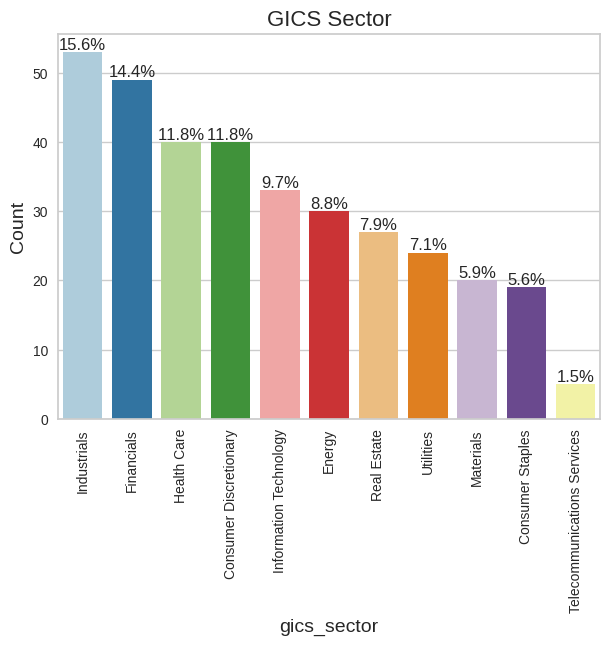

In [ ]:
count_plot(df, 'gics_sector', 'GICS Sector')

- There are 11 distinct sectors.
- Industrials and Financials are the largest sectors.
- Healthcare and Discretionary are tied, in that they make up 11.8% of stocks respectively.
- The Telecommunication Services sector is the smallest, accounting for 1.5% of the stocks.

**Observations on `gics_sub_industry`**

In [ ]:
#Calculate the number of distinct values for gics_sub_industry
df['gics_sub_industry'].nunique()

104

In [ ]:
#Review value counts for gics_sub_industry
df['gics_sub_industry'].value_counts(normalize=True)

,proportion
gics_sub_industry,
Oil & Gas Exploration & Production,0.047
REITs,0.041
Industrial Conglomerates,0.041
Electric Utilities,0.035
Internet Software & Services,0.035
Health Care Equipment,0.032
MultiUtilities,0.032
Banks,0.029
Property & Casualty Insurance,0.024


- There are 104 sub industries.
- Each sub-industry has a small number of companies, with Oil and Gas Exploration & Production having the largest share at approximately 5%.
- REITs, and Industrial Conglomerates come in second, making up ~4% of all sub industries respectively.
- Approximately 79% of all sub-industries each account for less than 3% of the total.


####**Multivariate Analysis**
- We will begin by checking strength of linear correlations among numerical variables.

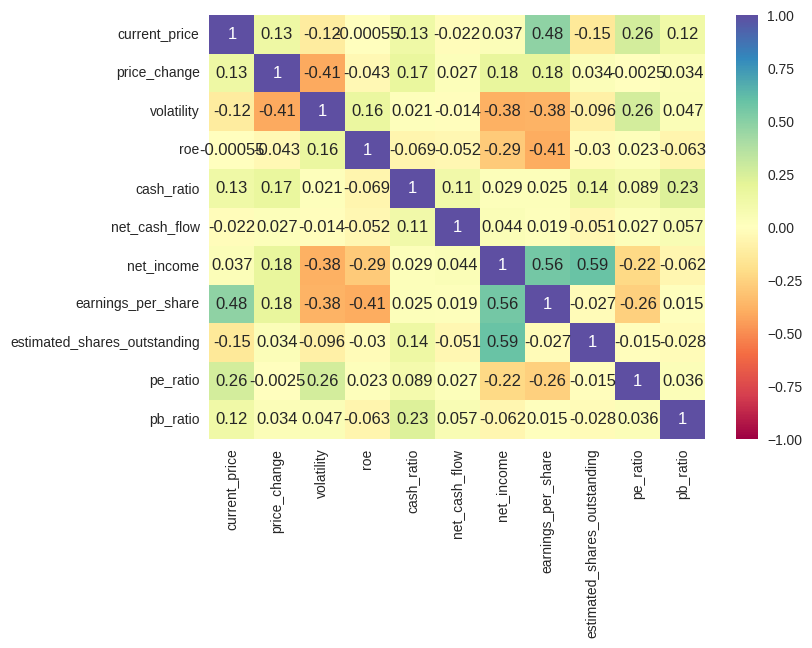

In [ ]:
#generate a heatmap
sns.heatmap(df[num_col].corr(), vmin=-1, vmax=1, cmap='Spectral', fmt='.2g', annot=True);

**Correlation of Attributes (Question 3):**
- Most pairs of attributes have correlation coefficients near 0, indicating no linear correlations among those attributes exist. Noteworthy correlations are listed below:
    - **Positive correlations** (as one increases, the other also increases):
      - `estimated_shares_outstanding` and `net_income` show a moderate linear relationship, suggesting that as the number of outstanding shares increases, a company's net income is also likely to rise and vice versa. **(correlation = 0.59)**.
      - `earnings_per_share` and `net_income` exhibit a moderate linear relationship, which is expected since an increase in a company's net income typically leads to higher earnings per share. **(correlation = 0.56)**.
      - `earnings_per_share` and `current_price` display a moderate linear relationship which makes sense since current stock price is expected to be associated with a company's earnings per share **(correlation = 0.48)**.
      - `pe_ratio` and `current_price` have a weak positive linear relationship, which can be expected since P/E ratio is calculated using the current price of stock **(correlation = 0.26)**.
      - Although it is weak, it is interesting to note that there exists a positive linear relationship between `pe_ratio` and `volatility` **(correlation = 0.26)**. This is likely due to the use of current stock price in both formulas.
      
    - **Negative correlations** (as one decreases, the other also decreases):
      - Although the relationship is weak, `volatility` appears to have a negative correlation with a few other attributes:
        - `volatility` and `price_change`exhibit a weak negative relationship **(correlation = - 0.41)**. This makes sense, given that high volatility in the past can lead to a decrease in projected stock price in the future. Inversely, low volatility in the past can lead to an increase in price in the future. This makes sense since low volatility is desirable and thus, more profitable.
        - `volatility` and `net_income` have a weak negative correlation, indicating that low volatility can suggest a higher net revenue and high volatility can lead to a lower net revenue **(correlation = - 0.38)**.
        - `volatility` and `earnings_per_share` have a weak negative correlation **(correlation = - 0.38)**. As stated previously, stocks with low volatility are typically more desirable and hence, more profitable. The inverse of this is also true.
      - `earnings_per_share` and `roe`  have a weak negative correlation **(correlation = - 0.41)**. This indicates that companies with higher EPS tend to have lower ROE, and vice versa.

**Generate a pair plot to visualize the correlations**

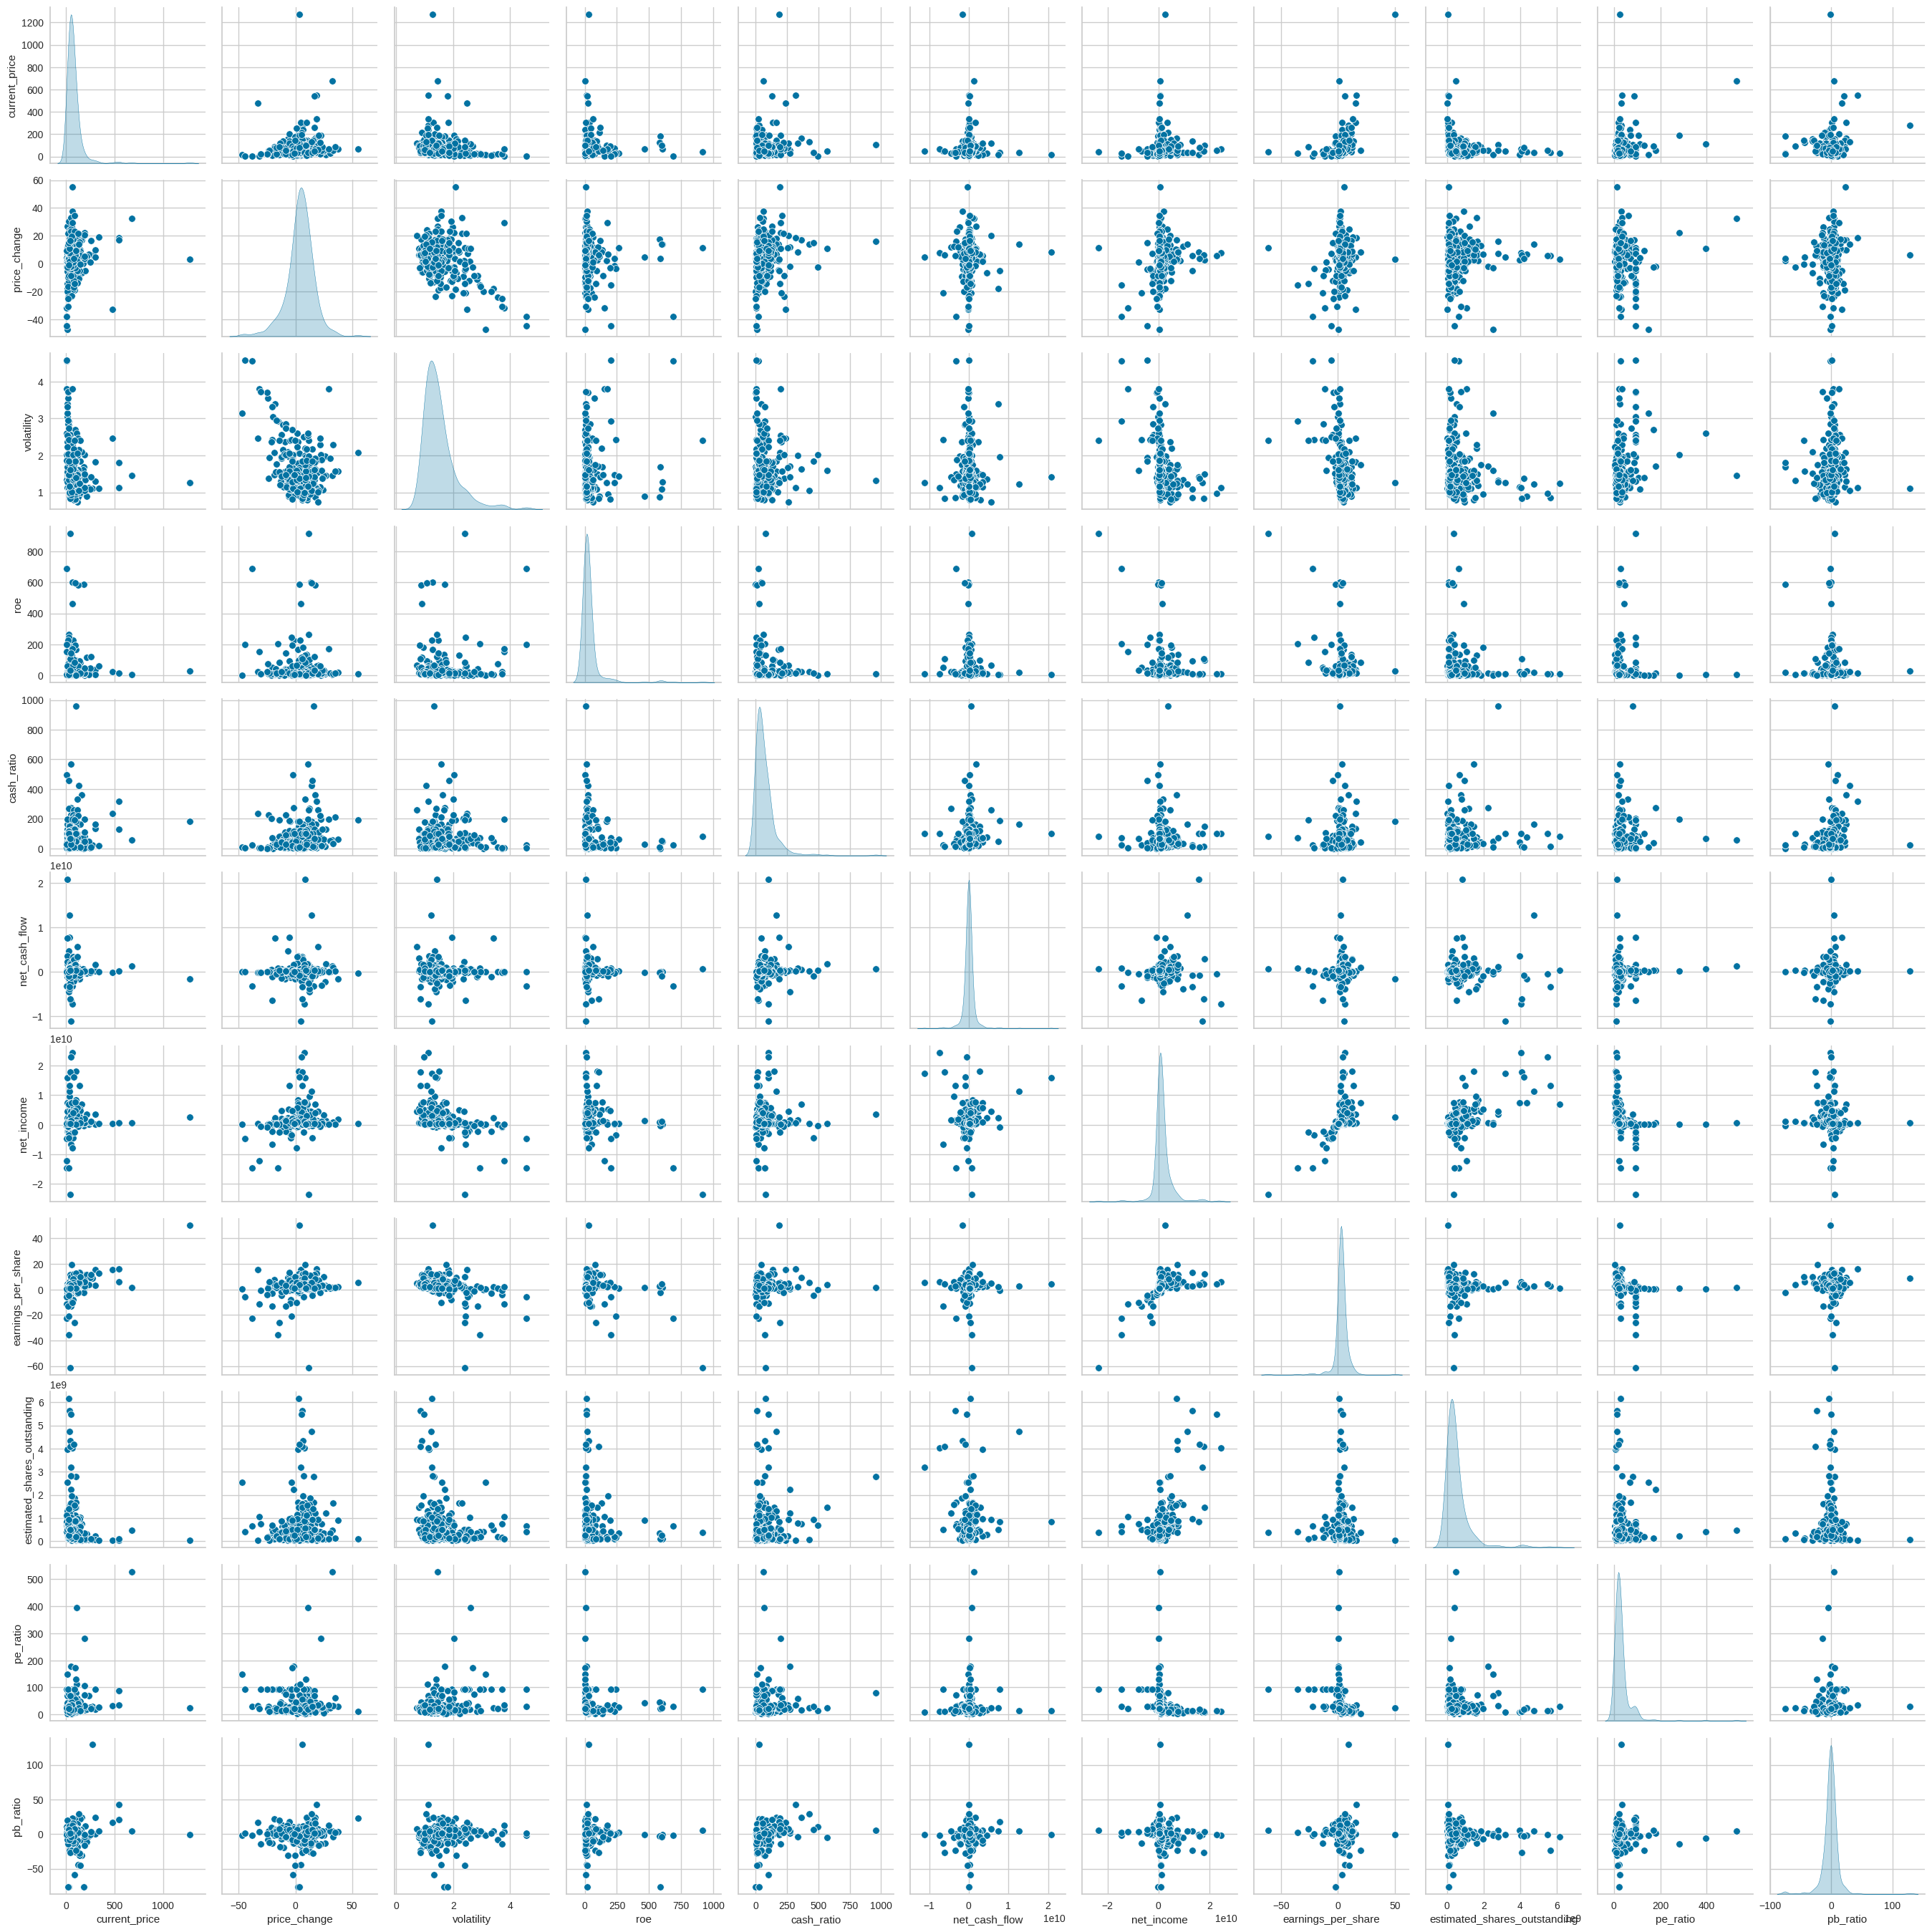

In [ ]:
#Generate a pairplot of df with only numerical attributes
sns.pairplot(df.select_dtypes(include=np.number), diag_kind="kde");

- Volatility showed to have moderate linear relationships with various attributes listed previously. The pairplot reveals that volatility values tend to be under 2, given that data points cluster the most within this domain. Here are some observations:
  - Companies with volatility values under 2 tend to have:
    - Less than 2 billion estimated outstanding shares
    - Values between 0 - $20 for `earnings_per_share`.
    - A `net_income` less than 10 billion dollars.
    - A cash_ratio less than 200.
    - An ROE less than 200.

**We will define a function that generates a bivariate barplot and arranges the bars in order from greatest to least.**

In [ ]:
#Function to generate a bivariable barplot that orders bars from greatest to least
def bivariate_barplot(data, x, y):

  #Group the data by the x variable and find each group's average. Sort in descending order
  df_sorted = data.groupby(x, as_index=False)[y].mean().sort_values(by=y, ascending=False)

  #Generate the barplot
  sns.barplot(data=df_sorted, x=x, y=y, hue=x, ci=False, palette='muted')
  plt.xticks(rotation=90);

**Determine which economic sector has seen the maximum price increase on average in their stocks. (Question 2)**

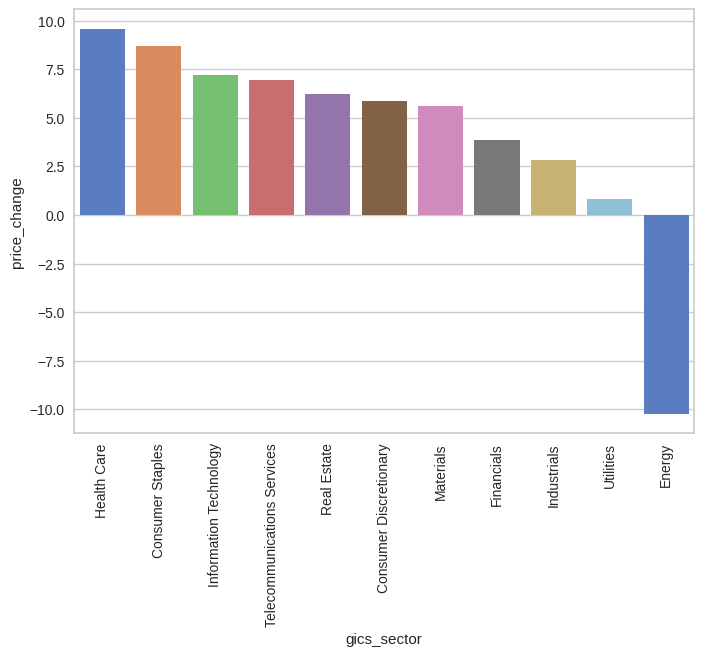

In [ ]:
#Generate a barplot displaying average price change per GICS sector
bivariate_barplot(df, 'gics_sector', 'price_change')

- The Health Care sector has experienced the highest price increase among all sectors, while Consumer Staples experienced the second highest price increase.
- The Energy sector has exhibited the largest price decrease among all sectors.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Here, we will explore how average cash ratios vary across economic sectors. (Question 4)**

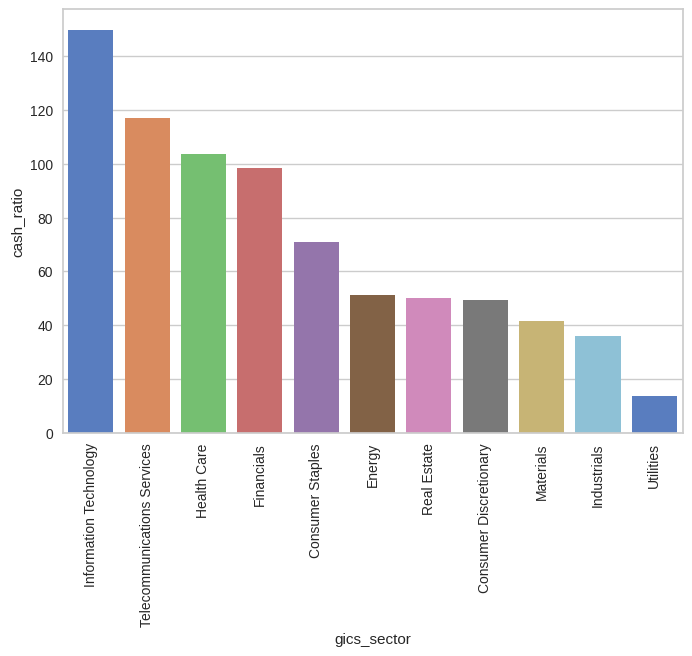

In [ ]:
#Generate a barplot visualizing the average cash ratios of each GICS sector
bivariate_barplot(df, 'gics_sector', 'cash_ratio')

- Informational Technology has the highest average cash ratio of 150 out of all sectors.
- Telecommunication Services has the second highest average cash ratio at 118.
- The Utilities and Industrial sectors have the lowest cash ratios at 17 and 38 respectively.


**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let us explore how P/E ratios vary, on average, across economic sectors. (Question 5)**

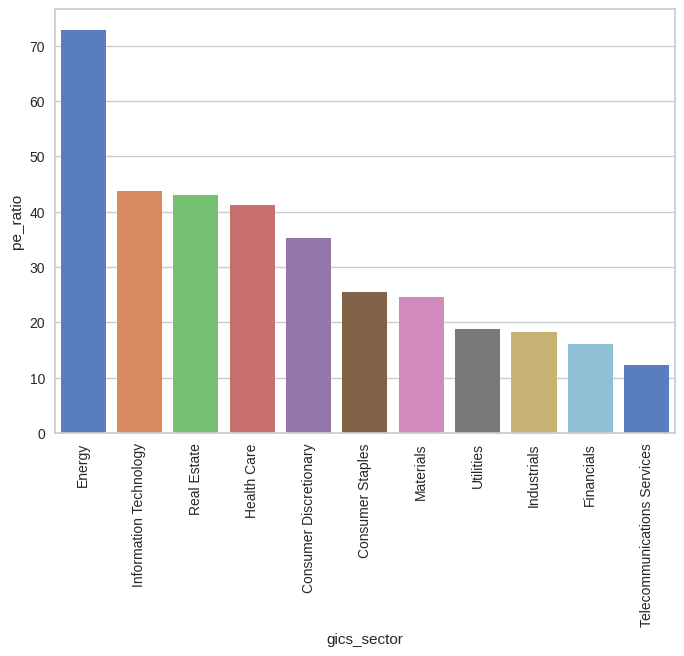

In [ ]:
#Generate a barplot displaying the average P/E ratio per GICS sector
bivariate_barplot(df, 'gics_sector', 'pe_ratio')

- The Energy sector drastically surpasses all other sectors in regard to P/E ratio, having a value at 75. This may indicate that the price of the average stock here is high, relative to earnings. That is, the price of the stock may be overvalued. It was noted previously that the Energy sector experienced the largest price decline among all sectors. This decrease in price may be because the stock price is overvalued.
- The Telecommunication Services sector has the lowest P/E ratio at 12. This is generally considered a good price-to-earnings ratio. It was noted previously that this same sector also had the second highest cash ratio, making it a good candidate, thus far, for investments.


## **Data Preprocessing**

###**Missing and Duplicated values**
- It was noted previously that there are no missing values or duplicated entries.

###**Drop attributes unique to each entry**
- We will drop `ticker_symbol`

In [ ]:
#Create a copy of the current dataset consisting of all attributes and their formatted names
data = df.copy()

#Drop 'ticker_symbol' from the data frame
data.drop(['ticker_symbol'], axis=1, inplace=True)
data.head()

,company_name,gics_sector,gics_sub_industry,current_price,price_change,volatility,roe,cash_ratio,net_cash_flow,net_income,earnings_per_share,estimated_shares_outstanding,pe_ratio,pb_ratio
0,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
3,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060


###**Outlier Check**

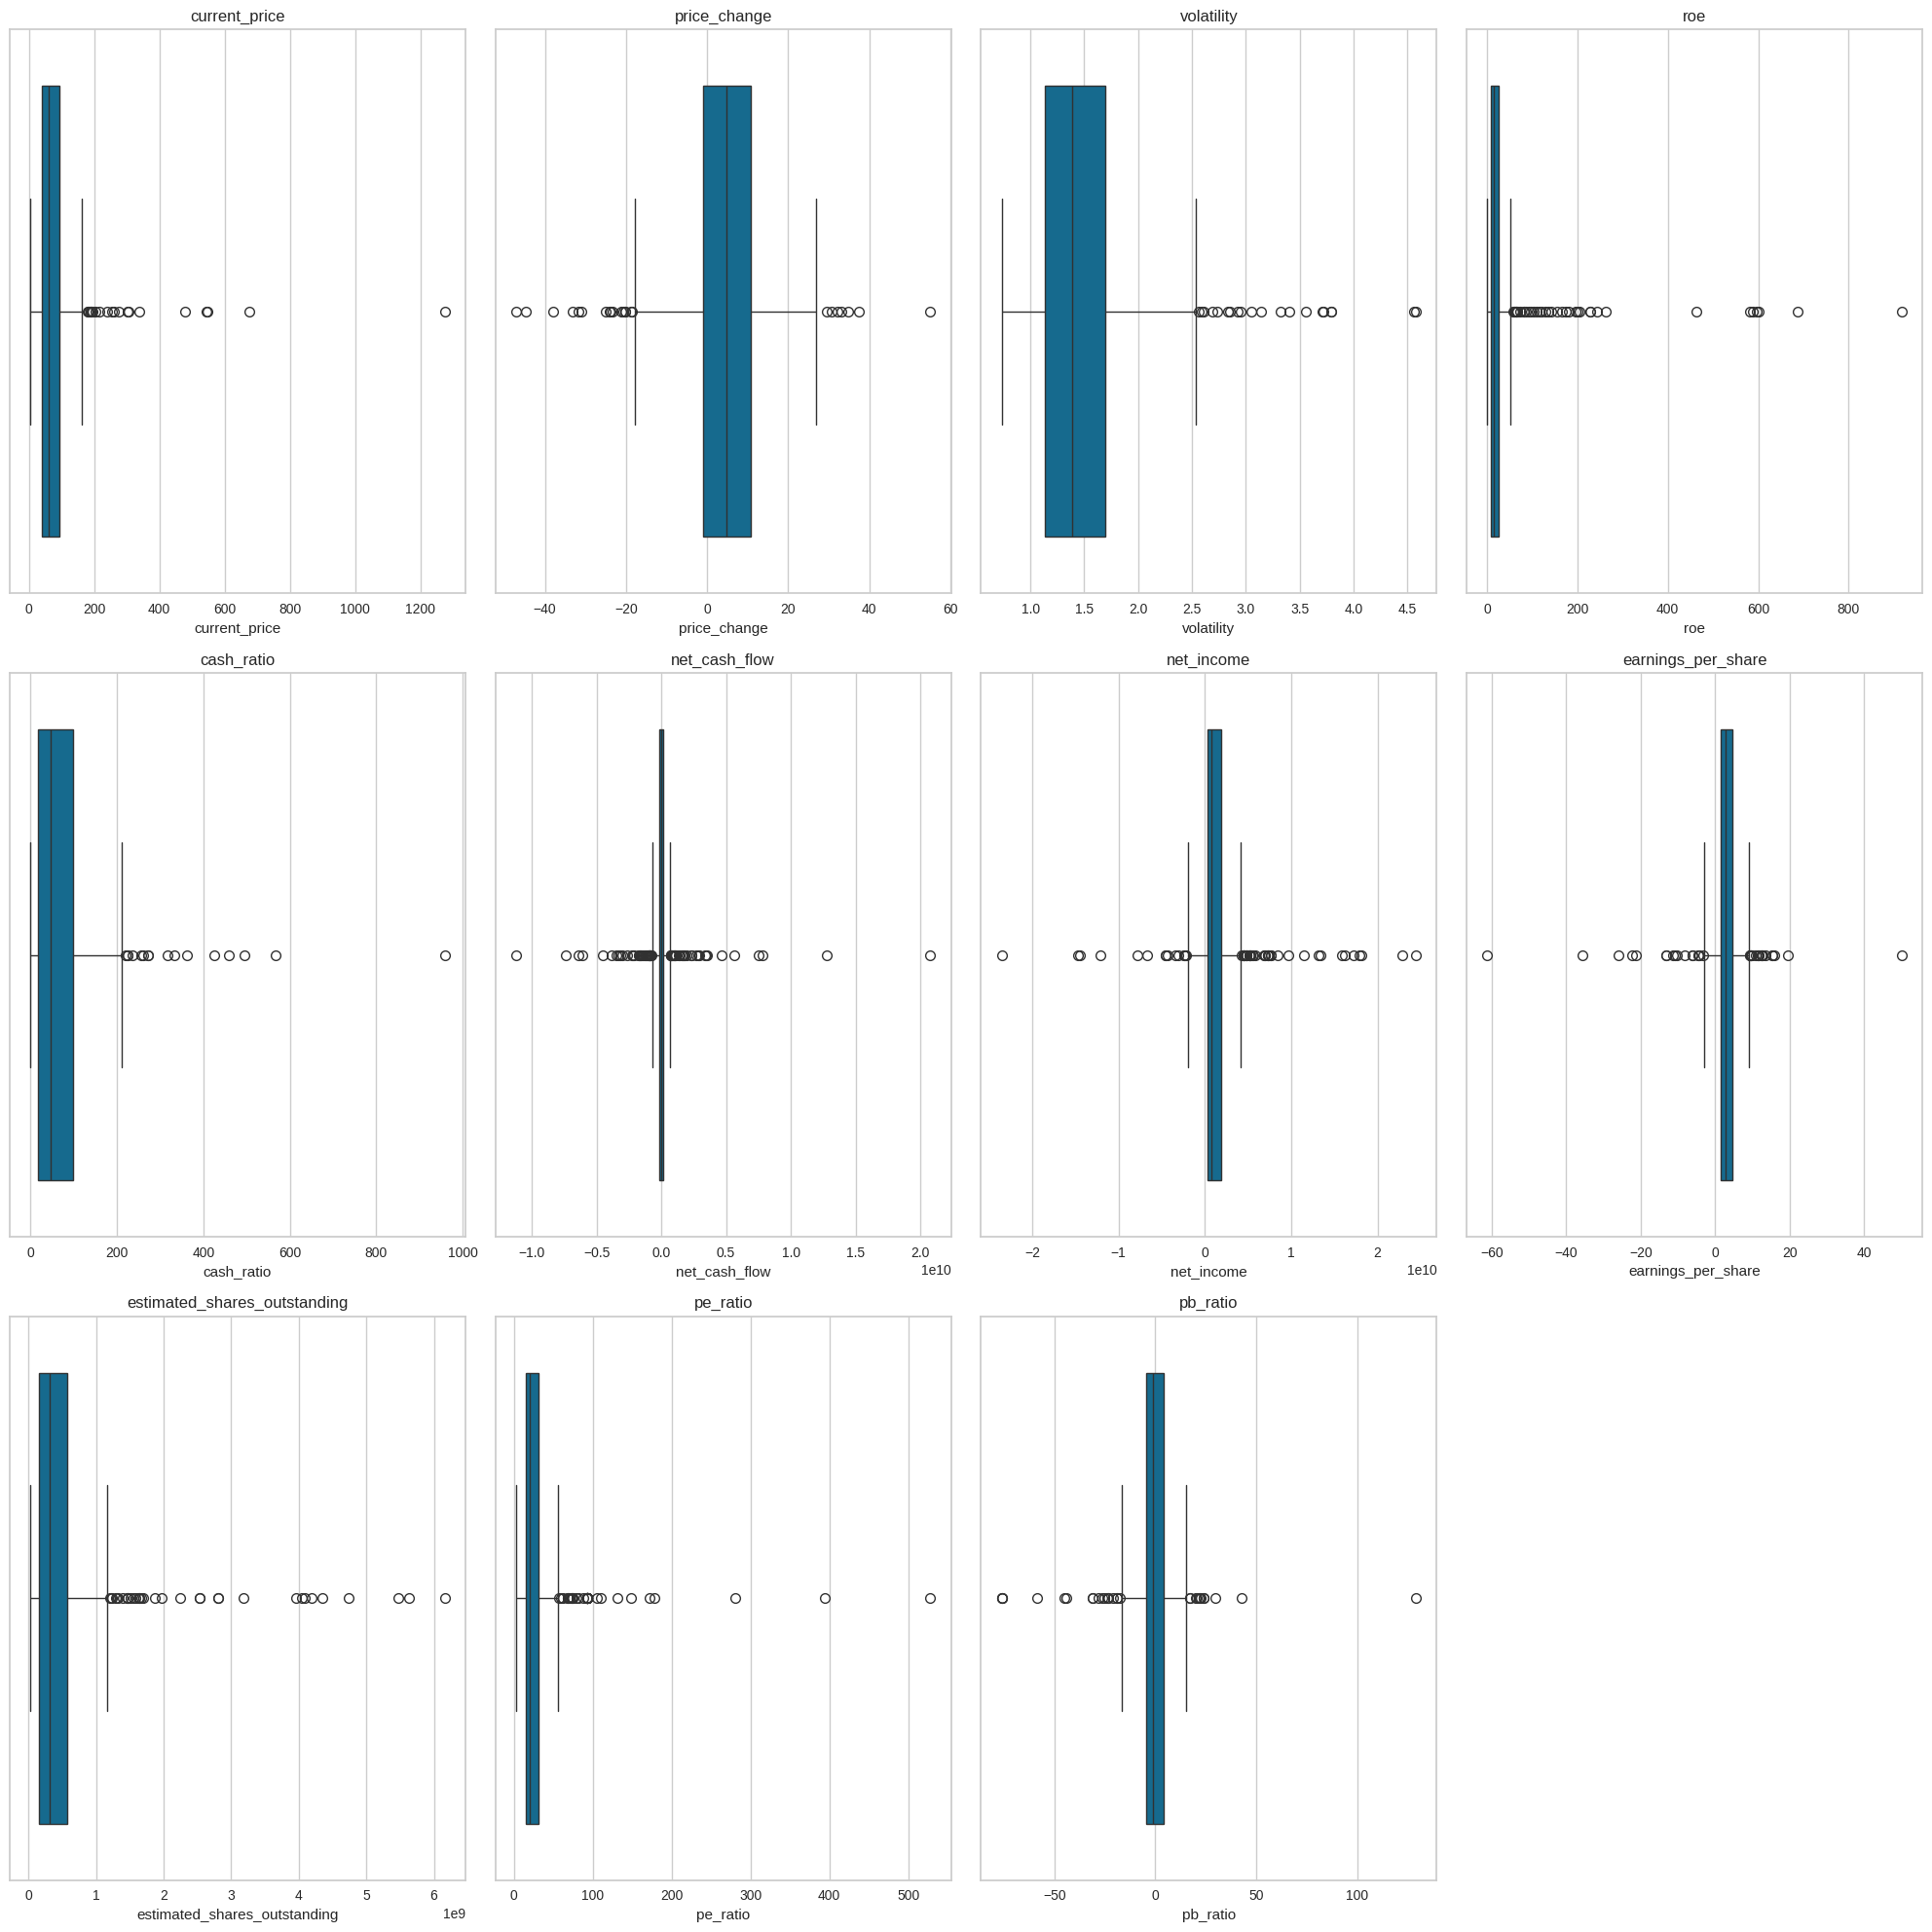

In [ ]:
#Plot boxplots for numerical columns only to visualize outliers and extreme values

plt.figure(figsize=(20,20))

for i, col in enumerate(num_col):
  plt.subplot(3, 4, i+1)
  sns.boxplot(data=data, x=col)
  plt.title(col)
  plt.tight_layout()

- As noted in the univariate analysis, many attributes are heavily right skewed, with extreme values in the upper bounds. `earnings_per_share` is severely right skewed, having numerous outliers in its upperbound. The same applies to `roe` and `current_price`.
- These outliers appear to be proper values and may provide useful insights, so they will not be treated.

###**Scaling the Data**

####**Given that we have attributes with varying measurement scales, we will scale the dataset before clustering.**

In [ ]:
#Scaling the dataset before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
#Create a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)
subset_scaled_df.head()

,current_price,price_change,volatility,roe,cash_ratio,net_cash_flow,net_income,earnings_per_share,estimated_shares_outstanding,pe_ratio,pb_ratio
0,-0.393,0.494,0.273,0.990,-0.211,-0.339,1.554,1.309,0.108,-0.652,-0.507
1,-0.221,0.355,1.137,0.938,0.077,-0.002,0.928,0.057,1.250,-0.312,-0.504
2,-0.367,0.602,-0.427,-0.193,-0.033,0.454,0.744,0.025,1.098,-0.392,0.095
3,0.134,0.826,-0.285,-0.317,1.218,-0.152,-0.220,-0.231,-0.092,0.947,0.424
4,-0.261,-0.493,0.296,-0.266,2.237,0.134,-0.203,-0.375,1.978,3.293,0.199


## **EDA**

###**Check outliers once more**

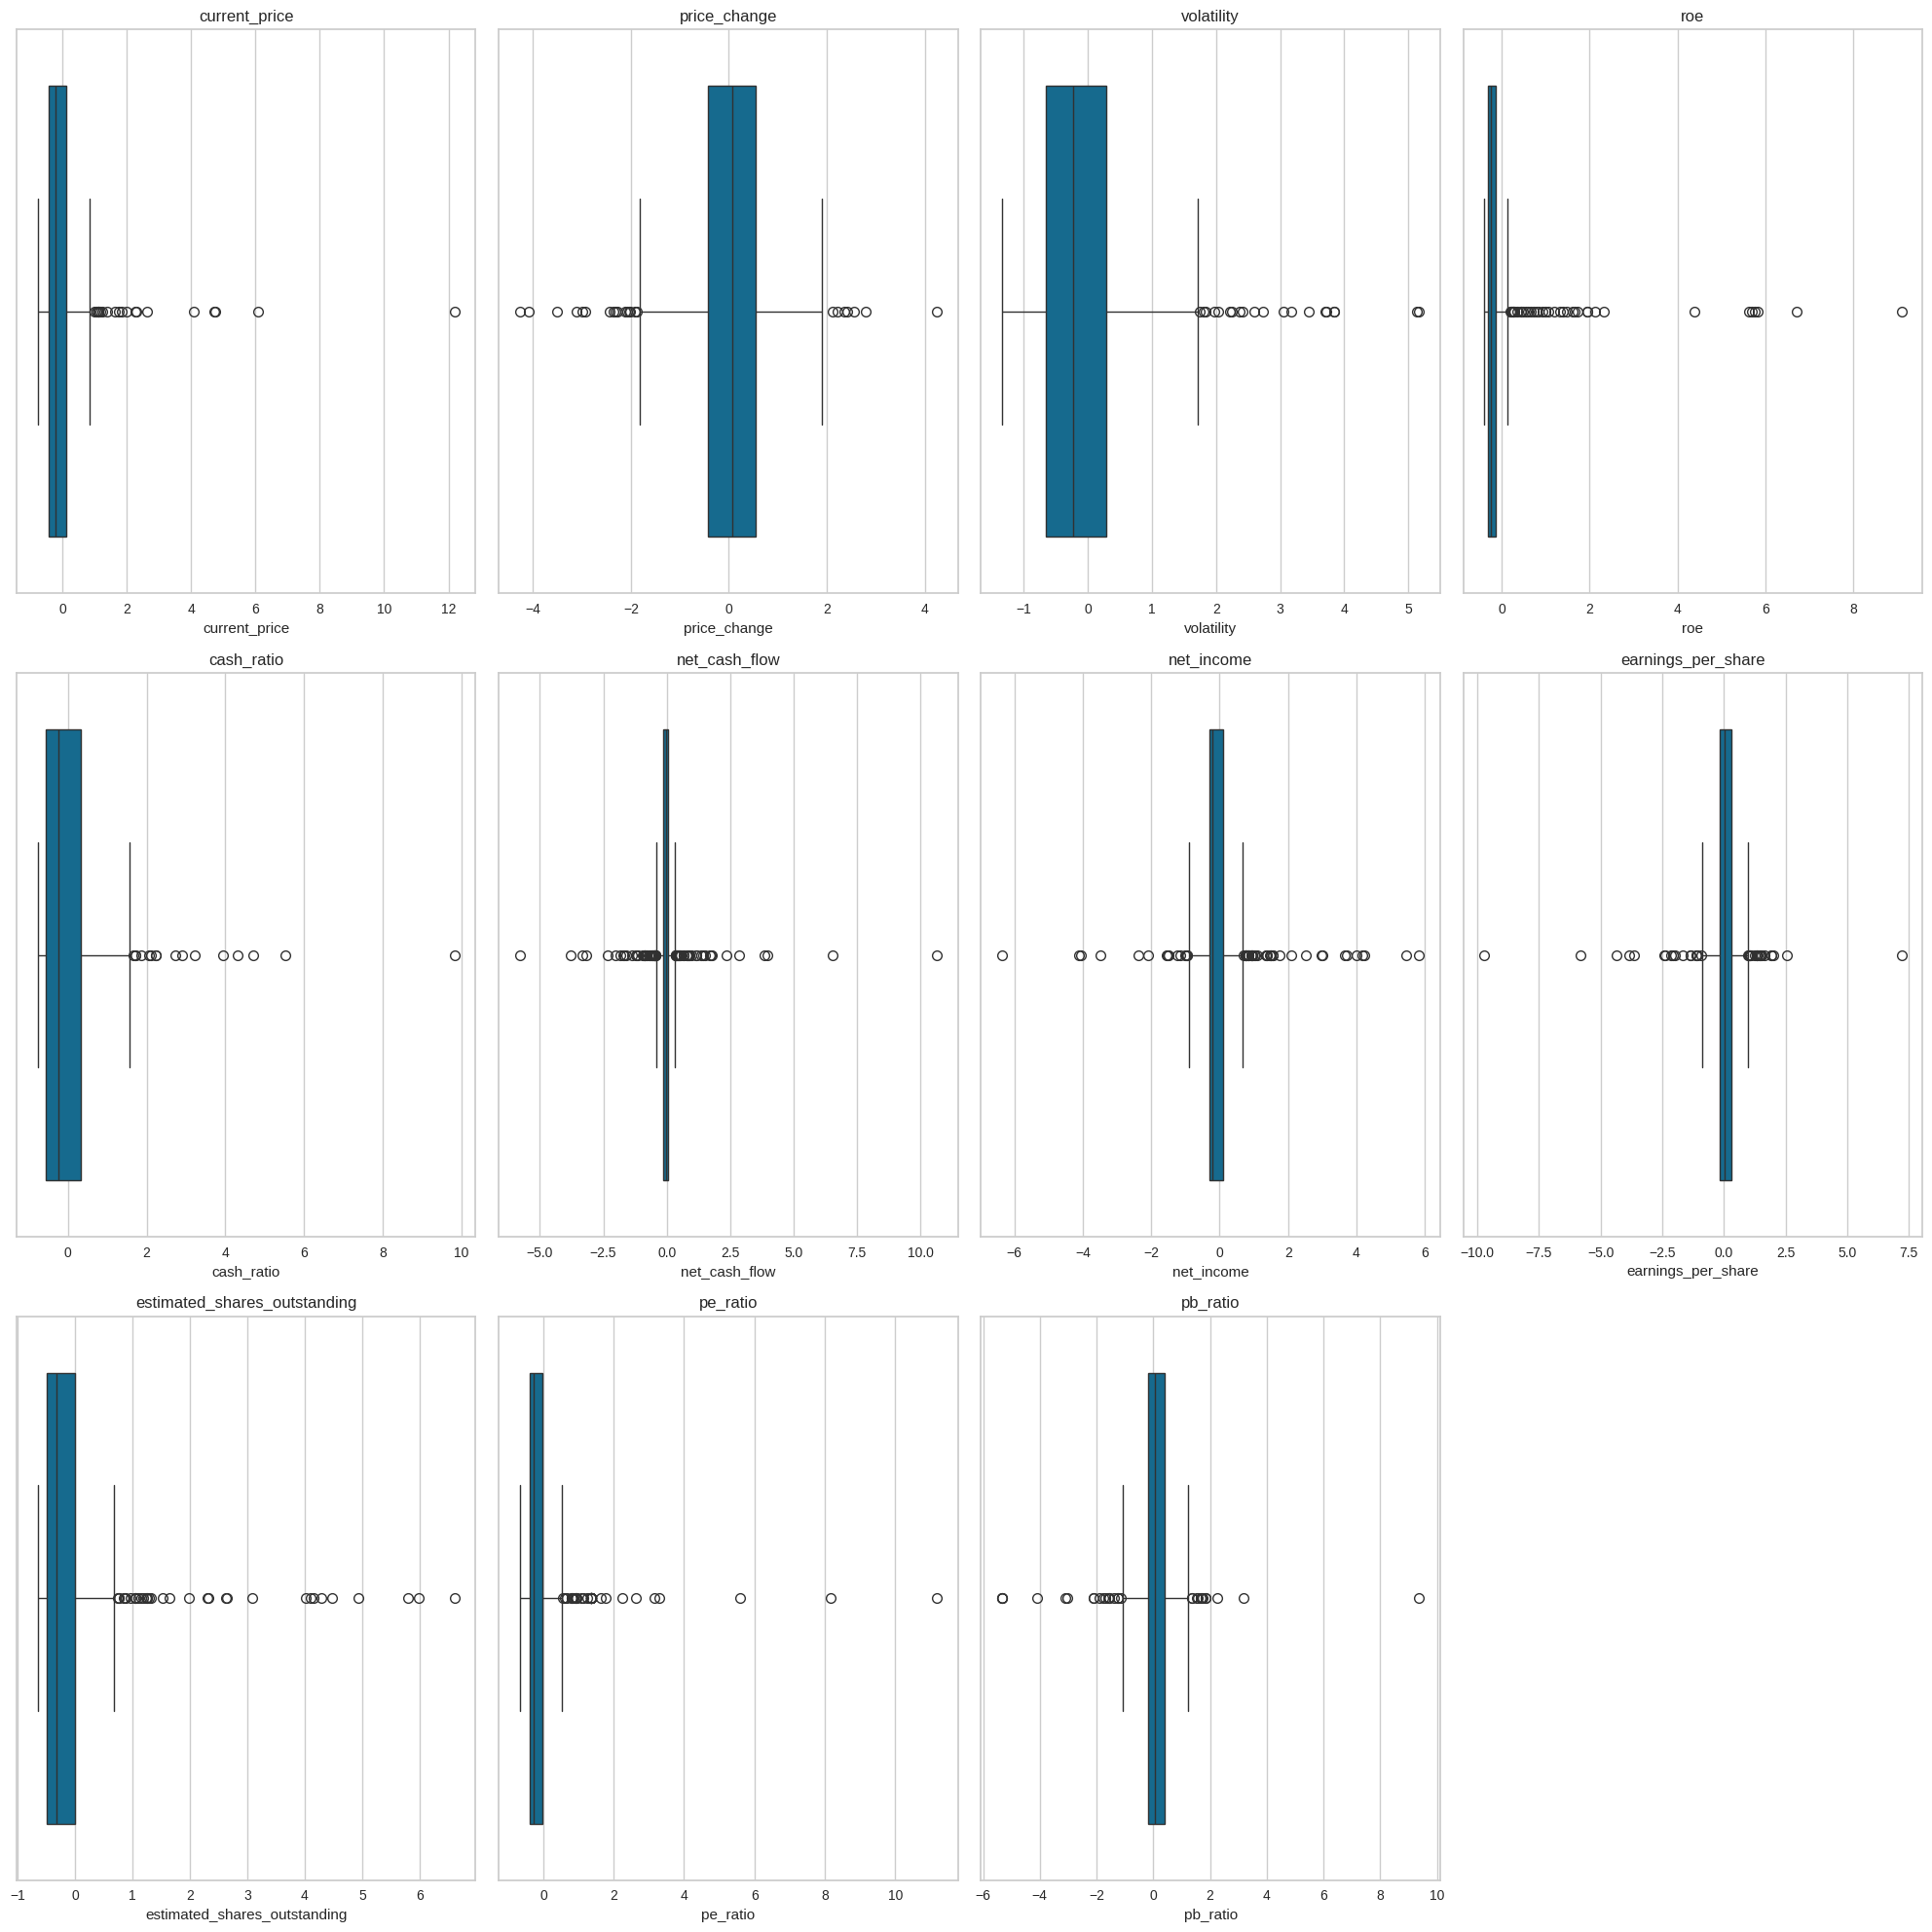

In [ ]:
#Plot boxplots for numerical columns only to visualize outliers and extreme values

plt.figure(figsize=(20,20))

for i, col in enumerate(num_col):
  plt.subplot(3, 4, i+1)
  sns.boxplot(data=subset_scaled_df, x=col)
  plt.title(col)
  plt.tight_layout()

- No significant changes are detected in the data's distribution after scaling.

## **K-means Clustering**

#### **Elbow Method**
- We will begin by using the elbow method to determine the optimal number of clusters.

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.384499097487295
Number of Clusters: 3 	Average Distortion: 2.2925536417824226
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1401947809691793
Number of Clusters: 6 	Average Distortion: 2.076138802310208
Number of Clusters: 7 	Average Distortion: 2.037075625256342
Number of Clusters: 8 	Average Distortion: 1.9949380420264025
Number of Clusters: 9 	Average Distortion: 1.9458140679136828
Number of Clusters: 10 	Average Distortion: 1.9005533102127603
Number of Clusters: 11 	Average Distortion: 1.8408334283117787
Number of Clusters: 12 	Average Distortion: 1.815371075526075


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

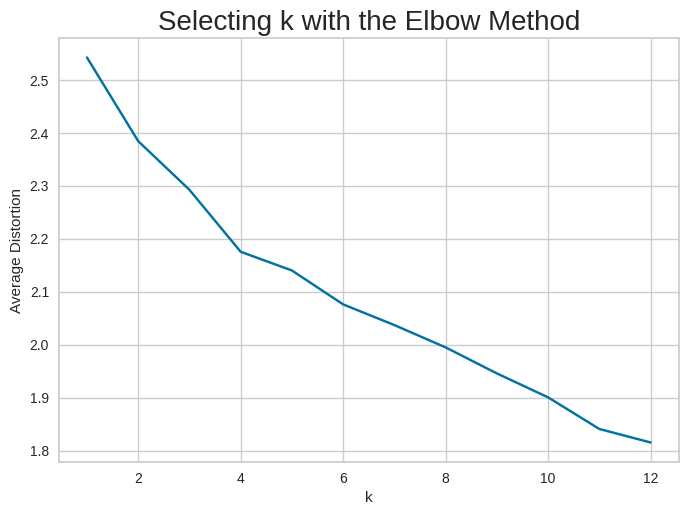

In [ ]:
clusters = range(1, 13) # Trying 1-12 clusters
meanDistortions = [] #Create an empty list to store the sum of squared distances

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1) #CALCULATE DISTANCE BW FEATURE VECTORS TO ALL CENTROIDS; THEN TAKE THE SUM OF MINIMUM DISTANCES OF ALL POINTS; DIVIDE BY # OF OBSERVATIONS? ; AVERAGE OF MIN DISTANCES PER OBSERVATION
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- 3 or 4 clusters look ideal, given the sharp decline in average distortion.

####**Silhouette scores**
- Now, we will consider silhouette scores, as they indicate how well the data points are clustered, given k clusters.

For n_clusters = 2, the silhouette score is 0.4484662124740991)
For n_clusters = 3, the silhouette score is 0.4419662311474576)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.4670141851729817)
For n_clusters = 6, the silhouette score is 0.16609442972204497)
For n_clusters = 7, the silhouette score is 0.16010466610937854)
For n_clusters = 8, the silhouette score is 0.3811731688385819)
For n_clusters = 9, the silhouette score is 0.16110839502412727)
For n_clusters = 10, the silhouette score is 0.15641849202440433)
For n_clusters = 11, the silhouette score is 0.16385704542238122)
For n_clusters = 12, the silhouette score is 0.17010462042670954)


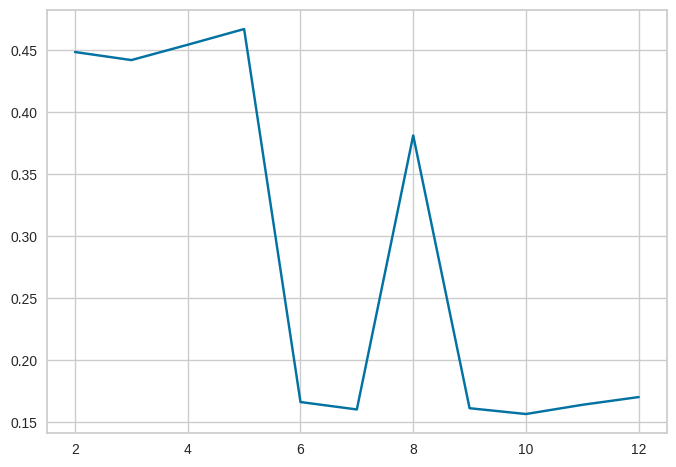

In [ ]:
sil_score = []
cluster_list = list(range(2, 13))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- The silhouette score is the highest when there are 4 and 5 clusters.

**We will further analyze how individual cluster groups compare to average silhouette scores at various values of k clusters. Specifically, we will try k values 3 to 5, as these values yielded the highest performance metrics.**

For K = 3


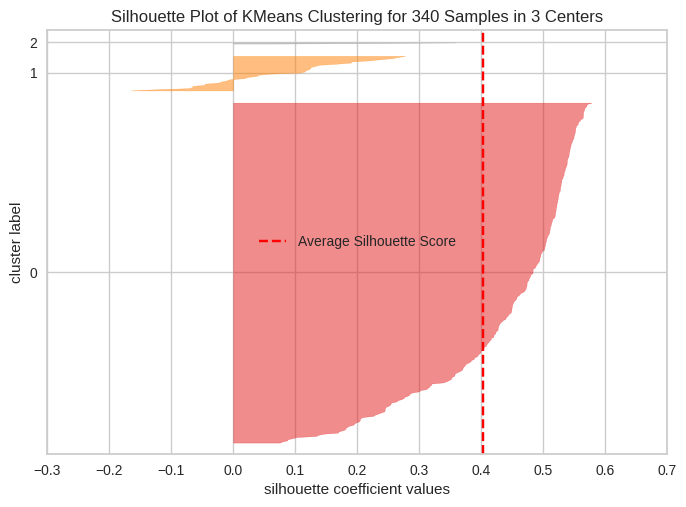

For K = 4


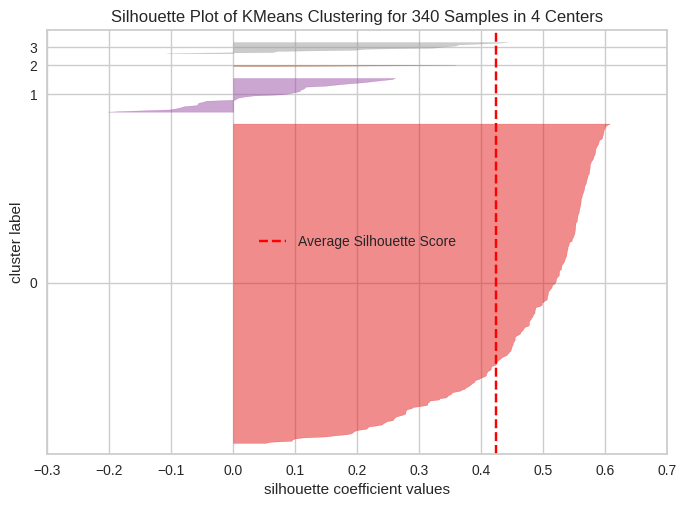

For K = 5


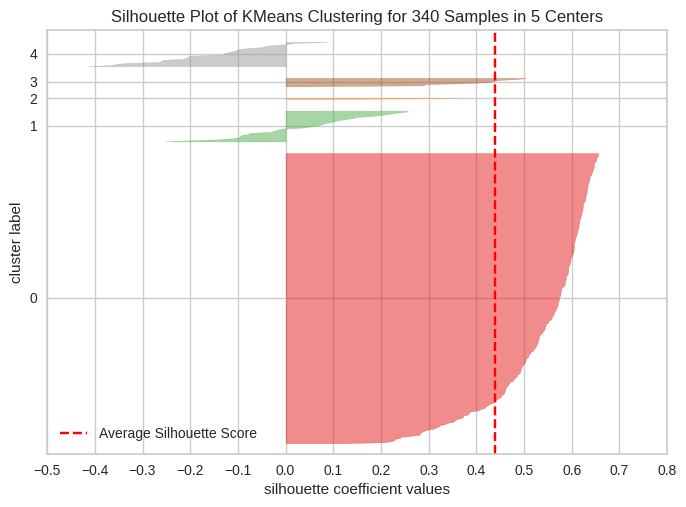

In [ ]:
#Create a range for k clusters
clusters = range(3,6)

for i in clusters:
  visualizer = SilhouetteVisualizer(KMeans(i, random_state=1))
  visualizer.fit(subset_scaled_df)
  print(f'For K = {i}')
  visualizer.show();

- For every cluster of K, there appears to be at least one cluster that comprises most of the data points. This cluster is likely dominating the average silhouette score.
- We will choose 4 to be the optimal number of clusters since the individual clusters seem to be closest to the average silhouette score. It is noted that when using 4 centers, clusters 1 and 2 are severely underperforming when compared to the average silhouette score. Despite taking this into account, four clusters still seems to be the best option for KMeans at this point.

####**Performing KMeans Clustering where n = 4**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
#Make a copy of the original data frame
data1 = data.copy()

#Make a copy of the scaled subset of the original data frame
subset_scaled_df1 = subset_scaled_df.copy()

#Add kmeans cluster labels to the original dataframe
data1['K_means_segments'] = kmeans.labels_
#Add kmeans cluster labels to the scaled subset of the original data frame
subset_scaled_df1['K_means_segments'] = kmeans.labels_

####**Cluster Profiling with KMeans Clusters**

In [ ]:
cluster_profile = data1.groupby('K_means_segments').mean(numeric_only=True)

In [ ]:
cluster_profile['count_in_each_segment'] = (
    data1.groupby('K_means_segments')['volatility'].count().values
)

In [ ]:
#Display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,current_price,price_change,volatility,roe,cash_ratio,net_cash_flow,net_income,earnings_per_share,estimated_shares_outstanding,pe_ratio,pb_ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
1,243.226804,13.607350,1.742959,26.416667,285.083333,754548500.000000,976137166.666667,6.122917,567201602.563333,77.542325,15.041637,24
2,72.199223,5.078363,1.388428,34.517986,53.165468,60694949.640288,1534031769.784173,3.623040,439996194.215863,23.804667,-3.350239,278
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11


- The four clusters are highly imbalanced in terms of the number of data points, with Cluster 2 containing the majority of observations. This imbalance may indicate suboptimal cluster assignment or the presence of a dominating class.
- Cluster 1 has the highest average values across multiple features.
- Cluster 2 has no highest average values for any attributes but holds the lowest average estimated outstanding shares.
- These will be described in greater detail after further analyzation.

**Analyze GICS sectors present in each cluster**

In [ ]:
#For loop that will print the percentage of each GICS sector present in each cluster
for label in data1['K_means_segments'].unique():
  label_subset = data1[data1['K_means_segments'] == label]
  print(f'GICS Sectors Present in Cluster {label}')
  print(label_subset['gics_sector'].value_counts())
  print('-' *40)

GICS Sectors Present in Cluster 2
gics_sector
Industrials                    52
Financials                     46
Consumer Discretionary         33
Health Care                    29
Real Estate                    26
Information Technology         24
Utilities                      24
Materials                      19
Consumer Staples               17
Energy                          6
Telecommunications Services     2
Name: count, dtype: int64
----------------------------------------
GICS Sectors Present in Cluster 1
gics_sector
Health Care                    9
Consumer Discretionary         6
Information Technology         5
Real Estate                    1
Telecommunications Services    1
Energy                         1
Consumer Staples               1
Name: count, dtype: int64
----------------------------------------
GICS Sectors Present in Cluster 0
gics_sector
Energy                    22
Information Technology     3
Materials                  1
Industrials                1
Name: c

**Analyze GICS subset industries present in each cluster**

In [ ]:
#For loop that will print the percentage of each GICS sub industries present in each cluster
for label in data1['K_means_segments'].unique():
  label_subset = data1[data1['K_means_segments'] == label]
  print(f'GICS Sub-industries Present in Cluster {label}:')
  print(label_subset['gics_sub_industry'].value_counts())
  print('-'*60)

GICS Sub-industries Present in Cluster 2:
gics_sub_industry
REITs                                              13
Industrial Conglomerates                           13
Electric Utilities                                 12
MultiUtilities                                     11
Internet Software & Services                        9
Health Care Equipment                               9
Property & Casualty Insurance                       8
Banks                                               7
Diversified Financial Services                      7
Packaged Foods & Meats                              6
Industrial Machinery                                5
Diversified Chemicals                               5
Airlines                                            5
Pharmaceuticals                                     5
Managed Health Care                                 5
Oil & Gas Refining & Marketing & Transportation     5
Consumer Finance                                    5
Health Care Facilities

- Cluster 0 is mainly comprised of the 'Energy' sector, accounting for about half of all data points classified within this sector. It contains all of the 'Oil and Gas Exploration & Production' data points. 'Integrated Oil and Gas' is the second largest sub-industry within this cluster.
- It is notable that Cluster 1 is primarily made up of the 'Biotechnology' sub-industry, accounting for 100% of all data points classified within this sector.The 'Internet
& Direct Marketing Retail' is the second largest sub-industry in this cluster.
- Cluster 2 primarily consists of data points in the 'Industrials' and 'Financials' sectors. These sectors were the largest sectors, which may be why there is a large imbalance of data points. Cluster 2 is also comprised of many of the largest sub-industries like, 'REITs', 'Industrial Conglomerates', 'Electric Utilities' and 'MultiUtilities'.
- Cluster 3 contains 30% of all all data points labeled as a 'Bank' sub-industry.The second largest sunb-industry in this cluster is 'Integrated Telecommunications Services'.



**Display company names present in each sector**

In [ ]:
# let's see the names of the countries in each cluster
for label in data1['K_means_segments'].unique():
    print(f'Total number of companies in cluster {label} is:', data1[data1['K_means_segments'] == label]['company_name'].nunique())
    print('Company Names: \n',data1[data1['K_means_segments'] == label]['company_name'].unique())
    print("-" * 75)

Total number of companies in cluster 2 is: 278
Company Names: 
 ['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chub

**Display distributions of each cluster for each attribute**

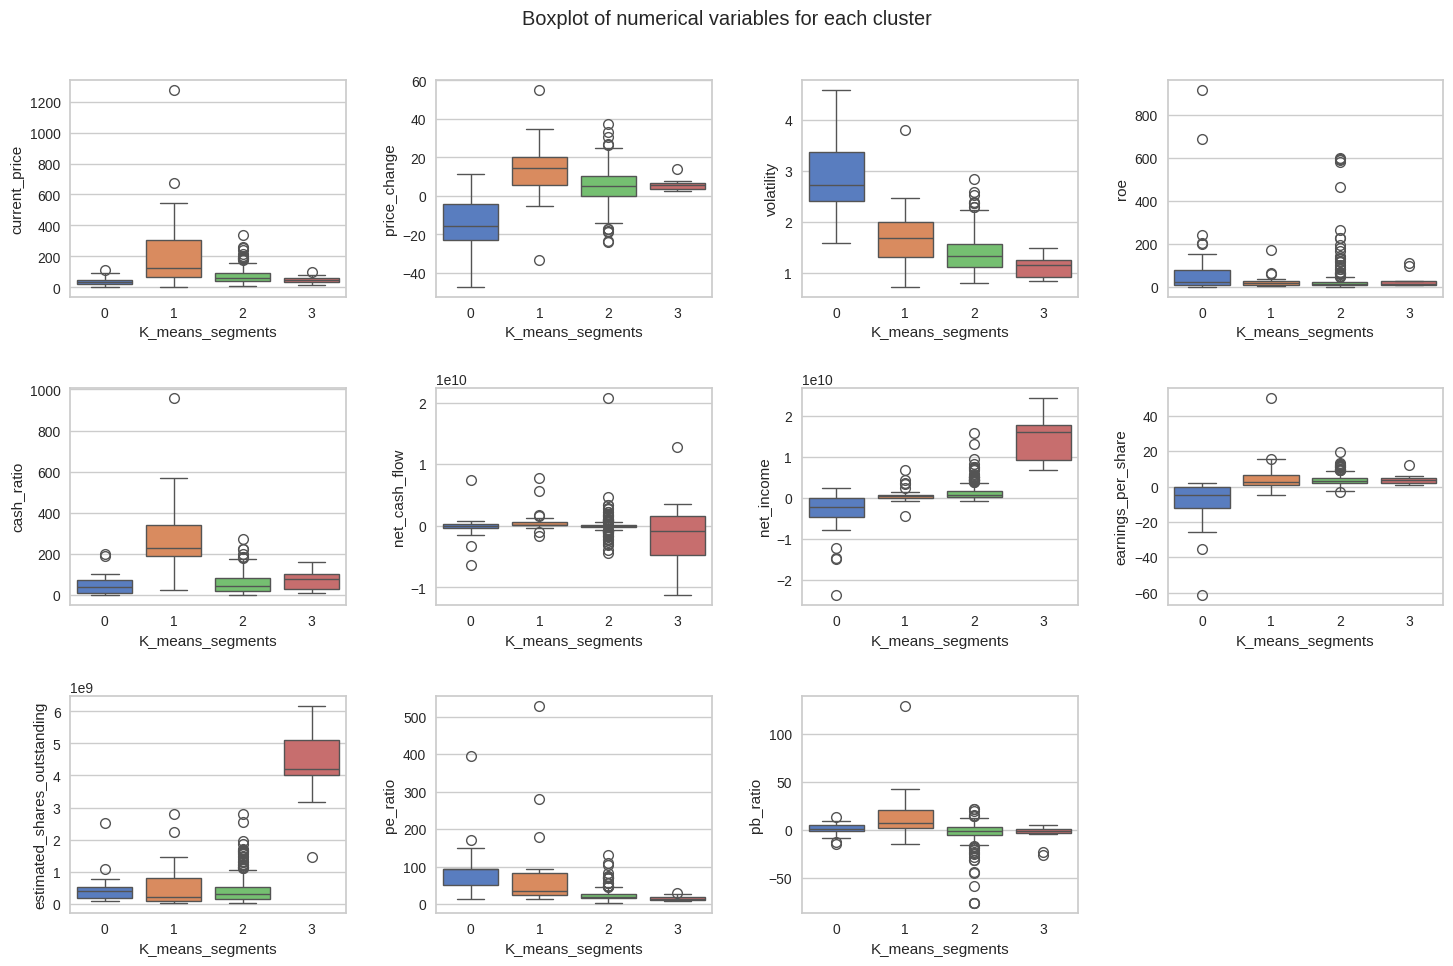

In [ ]:
#Generate boxplots for each numerical variable separated by cluster label
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    ax = sns.boxplot(data=data1, x="K_means_segments", y=variable, hue="K_means_segments", palette="muted")
    ax.legend_.remove()

plt.tight_layout(pad=2.0)

####**Insights**

- **Cluster 0:**
  - Number of observations: 27
  - This group has the highest average volatility (2.9), P/E ratio (90.6) and ROE (107.07).
  - This cluster has the lowest average price change (-15.37), net income (-3,887,457,740) and earnings per share (-9.47).
  - In addition, it has an average net cash flow of -159,428,481.
  - This cluster has the widest range of values for price change and volatility.
  - Given its history of erratic stock price movements and having an average net income of ~-3 billion dollars, this cluster of companies are not favorable investment choices for conservative and aggressive investors alike.
  - Largest GICS sectors:
    - Energy (22 observations)
  - Largest GICS sub-industries:
    - Oil & Gas Exploration & Production (16 observations)

- **Cluster 1:**
  - Number of observations: 24
  - This group has the highest current price (243.23), price change (13.60), cash ratio (285.08), net cash flow (754,548,500), earnings per share and P/B ratio (15.04).
  - This cluster appears to have high values in all other attributes, except volatility (1.74).
  - This cluster has a wide range of values for current price and cash ratio.
  - This seems to be an ideal group of companies to invest in for conservative investors, especially given its stability.
  - Largest GICS sectors:
    - Health Care (9 observations)
  - Largest GICS sub-industries:
    - Biotechnology (6 observations)
- **Cluster 2:**
  - Number of observations: 278
  - This cluster has the lowest average price change (5.08).
  - It has the second highest average in current price (72.20), ROE (34.52), net cash flow (60,694,949), net income (1,534,031,769) and the second lowest average in volatility (1.39).
  - It is notable that the P/B ratio is -3.35, which generally indicates that the companies have more liabilities than assets. Otherwise, this may be a good investment group, given its high ROE, net cash flow, net income and price stability.
  - This cluster has many outliers across all attributes, which is expected since it is a large cluster.
  - Largest GICS sectors:
    - Industrials (52 observations)
    - Financials (46 observations)
    - Consumer Discretionary (33 observations)
    - Health Care (29 observations)
  - Largest GICS sub-industries:
    - REITs (13 observations)
    - Industrial Conglomerates (13 observations)
    - Electric Utilities (12 observations)
    - MultiUtilities (11 observations)
- **Cluster 3:**
  - Number of observations: 11
  - Has the highest net income (14,833,090,909) and estimated outstanding shares (4,298,826,628).
  - In addition, it has the lowest average current price (50.52), volatility (1.13), net cash flow (-1,072,272,727), P/E ratio (14.8) and P/B ratio (-4.55).
  - The negative net cash flow of these companies show that they are spending more cash than they generate. In addition, the negative P/B ratio suggests that they have more liabilities than assets. These are to be further explored before investing. Some positives about this group are that they have a high net income and appear to have price stability, given the average volatility. The current price is also low and other metrics suggest strong profitability.
  - Largest GICS sectors:
    - Financials (3 observations)
  - Largest GICS sub-industries:
    - Banks (3 observations)

## **Hierarchical Clustering**

In [ ]:
#List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

#List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0 #Place holder for highest cophenetic correlation
high_dm_lm = [0, 0] #Place holder for optimal distance measure and linkage method

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c: #Retain the highest cophenetic correlation value
            high_cophenet_corr = c
            high_dm_lm[0] = dm #Retain distance metric of highest cophenetic value
            high_dm_lm[1] = lm #Retain linkage method of highest cophenetic value

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {:.2f}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.94, which is obtained with Euclidean distance and average linkage.


####**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


- We see that the Euclidean distance and average method combination has generated the optimal cophenetic correlation for various combinations of distance measures and linkage methods.

#### **Checking Dendrograms**

**Let us now check the dendrograms of Euclidean distance in combination with various linkage methods.**

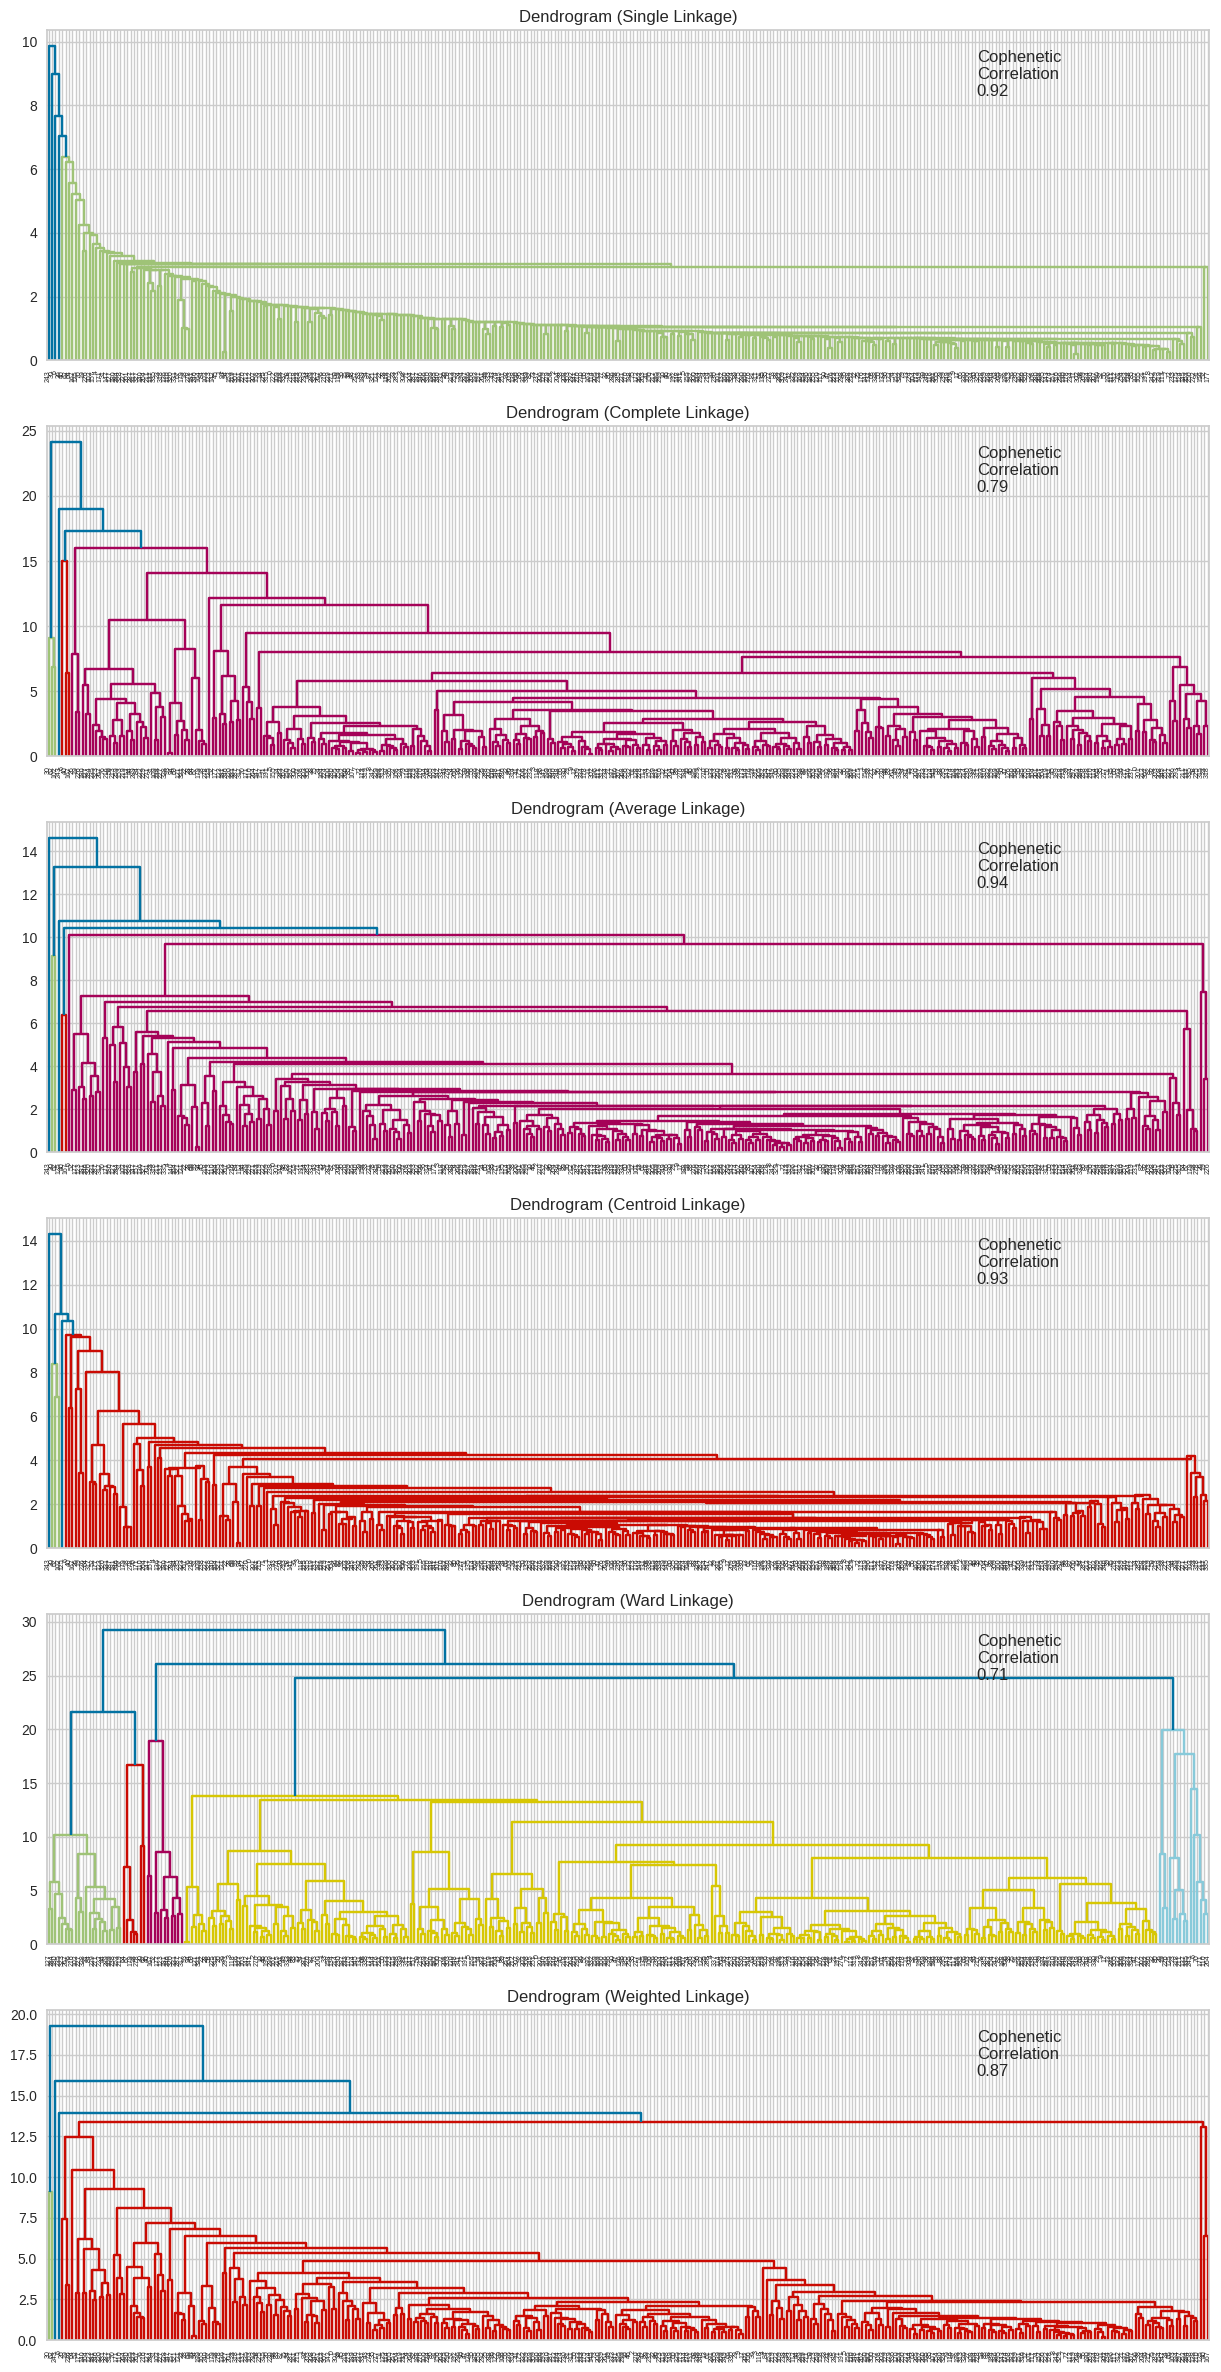

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- As noted previously, average linkage generated the highest cophenetic correlation. The dendrogram for average linkage showed that 5 is an optimal number of clusters at height 10. It is noted that there is one dominating cluster for this linkage method.
- Although Ward linkage has a cophenetic correlation value of 0.71, it appears to have distinct clusters in the dendrogram that have reasonable proportions. The optimal number of clusters for this method appears to be 5 at height 20. This can be an option if average appears to lack variability in its cluster groups.

#### **Performing Hierarchical Clustering using sklearn**
- Here, we are using Euclidean distance, average linkage and `n_clusters=5`.

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
#Make a copy of the original data frame
data2 = data.copy()

#Make a copy of the scaled subset of the original data frame
subset_scaled_df2 = subset_scaled_df.copy()

#Add kmeans cluster labels to the original dataframe
data2['HC_Clusters'] = HCmodel.labels_
#Add kmeans cluster labels to the scaled subset of the original data frame
subset_scaled_df2['HC_Clusters'] = HCmodel.labels_

####**Cluster Profiling**
- Average linkage

In [ ]:
cluster_profile = data2.groupby("HC_Clusters").mean(numeric_only=True)

cluster_profile["count_in_each_segments"] = (
    data2.groupby("HC_Clusters")["cash_ratio"].count().values
)

In [ ]:
#Display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,current_price,price_change,volatility,roe,cash_ratio,net_cash_flow,net_income,earnings_per_share,estimated_shares_outstanding,pe_ratio,pb_ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.884243,4.105986,1.516865,35.320359,66.775449,-32825817.365269,1535255703.592814,2.903308,559027333.145509,32.437511,-1.781988,334
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1


- We see that there are 334 data points assigned to cluster 0, two data points assigned to clusters 1 and 2 respectively and one data point assigned to clusters 3 and 4 respectively.
- It is clear that this segments are highly disproportionate. We will try Ward' linkage method with Euclidean distance, since its clusters appeared to be more distinct and reasonably proportioned. Five appeared to be the optimal number of clusters with this method.

#### **Hierarchical Clustering with Ward linkage**
- Here, we are using Euclidean distance, ward linkage and `n_clusters=5`.

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [ ]:
subset_scaled_df2["HC_Clusters"] = HCmodel.labels_
data2["HC_Clusters"] = HCmodel.labels_

####**Cluster Profiling**
- Ward linkage

In [ ]:
cluster_profile = data2.groupby("HC_Clusters").mean(numeric_only=True)

cluster_profile["count_in_each_segments"] = (
    data2.groupby("HC_Clusters")["cash_ratio"].count().values
)

In [ ]:
#Display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,current_price,price_change,volatility,roe,cash_ratio,net_cash_flow,net_income,earnings_per_share,estimated_shares_outstanding,pe_ratio,pb_ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


- We seem to have slightly better proportions here than the clusters created previously with average linkage.
- There still appears to be a dominating class, which in this case is cluster 3, containing 285 data points.
- Cluster 0 has the highest scores for six attributes.
- Cluster 3 is largest cluster and does not hold any of the highest or lowest values for the numerical attributes.

**Analyze GICS sectors present in each cluster**

In [ ]:
#For loop that will print the percentage of each GICS sector present in each cluster
for label in data2['HC_Clusters'].unique():
  label_subset = data2[data2['HC_Clusters'] == label]
  print(f'GICS Sectors Present in Cluster {label}')
  print(label_subset['gics_sector'].value_counts())
  print('-' *40)

GICS Sectors Present in Cluster 3
gics_sector
Industrials                    52
Financials                     44
Consumer Discretionary         35
Health Care                    34
Information Technology         27
Real Estate                    26
Utilities                      24
Materials                      19
Consumer Staples               15
Energy                          7
Telecommunications Services     2
Name: count, dtype: int64
----------------------------------------
GICS Sectors Present in Cluster 0
gics_sector
Health Care                    5
Information Technology         4
Consumer Discretionary         3
Real Estate                    1
Telecommunications Services    1
Consumer Staples               1
Name: count, dtype: int64
----------------------------------------
GICS Sectors Present in Cluster 1
gics_sector
Energy                    2
Consumer Staples          2
Industrials               1
Consumer Discretionary    1
Financials                1
Name: count, dty

**Analyze GICS subset industries present in each cluster**

In [ ]:
#For loop that will print the percentage of each GICS sub industries present in each cluster
for label in data2['HC_Clusters'].unique():
  label_subset = data2[data2['HC_Clusters'] == label]
  print(f'GICS Sub-industries Present in Cluster {label}:')
  print(label_subset['gics_sub_industry'].value_counts())
  print('-'*60)

GICS Sub-industries Present in Cluster 3:
gics_sub_industry
Industrial Conglomerates                           14
REITs                                              13
Electric Utilities                                 12
MultiUtilities                                     11
Health Care Equipment                              10
Internet Software & Services                        9
Property & Casualty Insurance                       8
Packaged Foods & Meats                              6
Banks                                               6
Diversified Financial Services                      6
Airlines                                            5
Managed Health Care                                 5
Pharmaceuticals                                     5
Industrial Machinery                                5
Consumer Finance                                    5
Health Care Facilities                              5
Diversified Chemicals                               5
Semiconductors        

- Industrials, Financials, Healthcare and Discretionary are the sectors primarily assigned to cluster 3. These were the top 4 largest sectors out of all sectors in the data. This may be why the cluster size is so large.
- Cluster 4 is predominantly composed of the Energy sector, accounting for two-thirds of all data points classified within this sector.
- Clusters 3 and 4 seem to have more homogeneous clusters than the other clusters.

**Display company names present in each sector**

In [ ]:
# let's see the names of the countries in each cluster
for label in data2['HC_Clusters'].unique():
    print(f'Total number of companies in cluster {label} is:', data2[data2['HC_Clusters'] == label]['company_name'].nunique())
    print('Company Names: \n',data2[data2['HC_Clusters'] == label]['company_name'].unique())
    print("-" * 75)

Total number of companies in cluster 3 is: 285
Company Names: 
 ['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc

**Display distributions of each cluster for each feature**

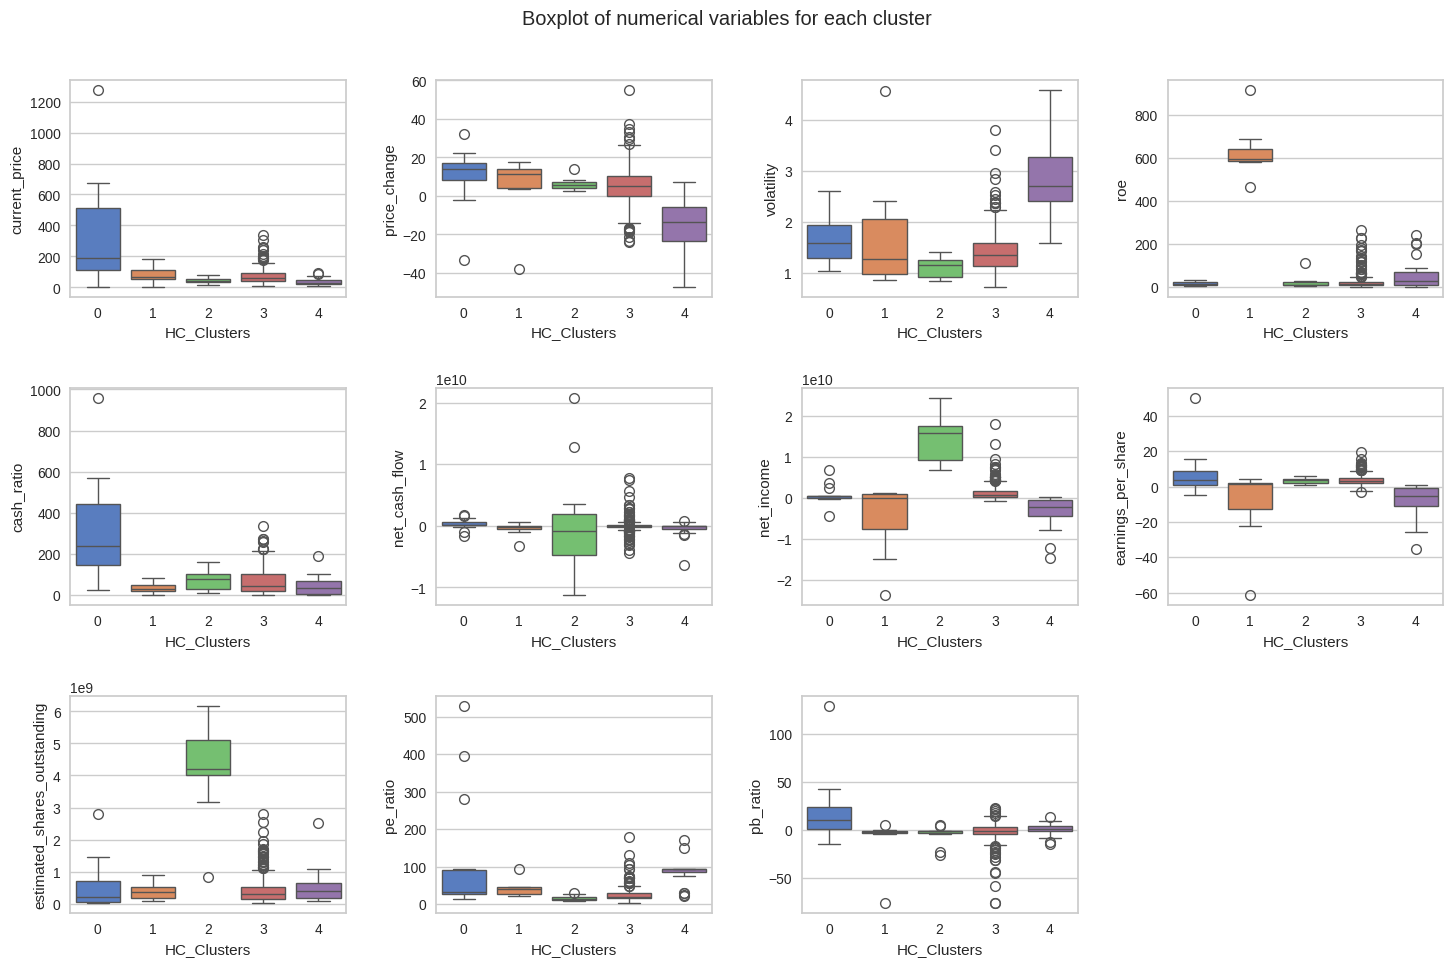

In [ ]:
#Generate boxplots for each numerical variable separated by cluster label
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    ax = sns.boxplot(data=data2, x="HC_Clusters", y=variable, hue="HC_Clusters", palette="muted")
    ax.legend_.remove()

plt.tight_layout(pad=2.0)

####**Insights**

- **Cluster 0:**
  - Total number of observations: 15
  - This cluster has the highest average current price (326.20), price change (10.56), cash ratio (309.46), earnings per share (7.79), P/E ratio (113.10) and P/B ratio (19.14).
  - This cluster has the lowest average ROE (14.40).
  - Companies in this cluster have high current prices and high P/E and P/B ratios, which may suggest that the price is overvalued. Investors can invest with caution and consider the company’s future earnings potential to justify high stock prices.
  - Largest GICS sectors:
    - Health Care (5 observations)
    - Information Technology (4 observations)
  - Largest GICS sub industries:
    - Biotechnology (3 observations)
    - Internet Software & Services (3 observations)
- **Cluster 1:**
  - Total number of observations: 7
  - This cluster has the highest average ROE at $633.57 and the second highest average volatility at 1.83.
  - It has the lowest average cash ratio (33.57), net cash flow (~ -568 million), net income (~ -5 billion), earnings per share (-10.84), estimated outstanding shares(~400 million) and P/B ratio (-11.59).
  - Investing in these companies would be high risk investments as they appear to be losing money.
  - Largest GICS sectors:
    - Energy (2 observations)
    - Consumer Staples (2 observations)
  - Largest GICS sub industries:
      - Household Products (2 observations)
- **Cluster 2:**
  - Total number of observations: 11
  - This group has the highest average net cash flow (558,636,363), net income 	(14,631,272,727), estimated outstanding shares (4,242,572,567).
  - This group has the lowest average volatility (1.12) and P/E ratio (15.24). In addition it has a negative P/B ratio at -4.92.
  - The attribute that stands out the most is the negative P/B ratio, which typically indicates that a company has more liabilities than assets. It is important to explore why that is, if one is considering investing in any one of these companies. Otherwise, stocks in this group appear to be stable, have strong profitability and have a cheap price relative to earnings.
  - Largest GICS sectors:
    - Financials (4 observations)
  - Largest GICS sub industries:
    - Banks (4 observations)
    - Integrated Telecommunications Services (2 observations)
- **Cluster 3:**
  - Total number of observations: 285
  - This cluster has no maximum average values.
  - It has the second lowest average volatility (1.43) and second lowest average P/E ratio (24.72). In addition this group has a P/B ratio -2.67.
  - This group has the second highest average net income (~1.5 billion) and relatively high current price of 72.76.
  - Overall, this cluster demonstrates stability through its average volatility, profitability and shows to have a reasonable price relative to earnings. The negative P/B ratio should be investigated for reasons stated previously, in regard to liabilities to assets ratio.
  - Largest GICS sectors:
    - Industrials (52 observations)
    - Financials (44 observations)
    - Consumer Discretionary (35 observations)
    - Health Care (34 observations)
  - Largest GICS sub industries:
    - Industrial Conglomerates (14 observations)
    - REITs (13 observations)
    - Electric Utilities (12 observations)
    - MultiUtilities (11 observations)
- **Cluster 4:**
  - Total number of observations: 22
  - This cluster has the highest average volatility (2.83).
  - It has a relatively high average P/E ratio (85.55) and P/B ratio (0.84).
  - It has the lowest average current price (36.44), price change (-16.07)
  This group has the second lowest average net cash flow (- 472,834,090), earnings per share (-8), and net income (- 3,161,045,227).
  - Investing in stocks in this group is very risky since it appears that companies are losing money and are spending more cash than it generates. The volatility indicates that the stock price is highly unstable and the negative stock price suggests that its value is declining.
  - Largest GICS sectors:
    - Energy (20 observations)
  - Largest GICS sub industries:
    - Oil & Gas Exploration & Production (14 observations)

## **K-means vs Hierarchical Clustering**

- **Similarities:**
  - Overall, the profiles of each cluster are comparable across clustering methods. They are comparable in size and companies within each cluster, thus they generally have similar stock metrics and GICS sectors. The following table demonstrates this, where the cluster on the left is from the K-means method and the cluster on the left is from the hierarchical clustering method. **The number in parenthesis is the number of observations for the description.**
    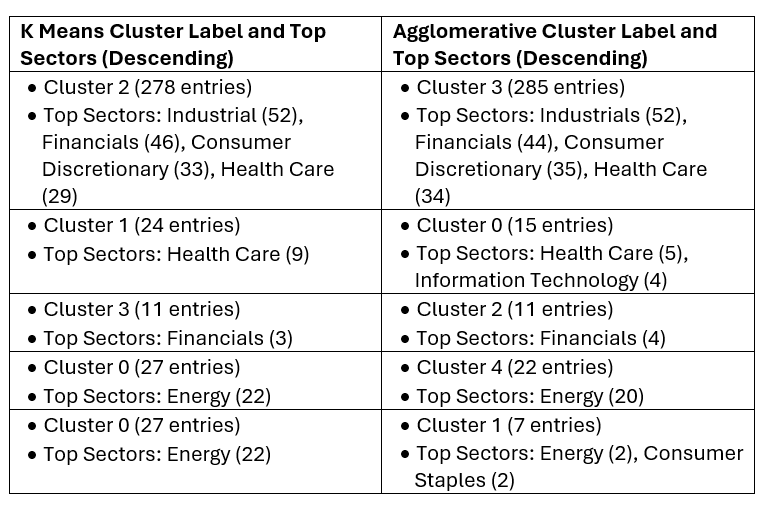
  - Both clustering methods have a dominating segment that contains about 281 observations respectively.
  - Both clustering methods were computationally inexpensive, likely due to the small data size.
- **Differences:**
    - Although not off by much, the optimal number of clusters differed for each segmentation method. The K-means method suggested 4 segments, whereas the hierarchical method suggested 5.
    - K-means clustering gave more distinct groups. The clusters are slightly more homogeneous in regards to GICS sectors within each group, compared to that of the hierarchical clusters.


## **Actionable Insights and Recommendations**
- **Clustering method:**
  - K-means clustering yielded more distinct clusters than that of the hierarchical clustering method.
  - Four  clusters was the ideal number for the K-means method, due to the largest decline in distortion at this point and generating a high silhouette score.
  - It is noted that there is a dominant segment that contains about 82% of the data points.
  - It should be considered that dimensionality reduction can be performed prior to clustering, to see if the dominant segment is still present or if more distinguished clusters are formed as a result. PCA can be considered for this option.
- **Recommendations:**
  - **Risky investments:**
    - Companies in cluster 0 are high risk investments since they are losing money, possibly by spending more money than they generate. Volatility values in this cluster indicate that stock prices for these companies are highly unstable and have declining stock price values.
    - Companies in cluster 3 appear to be stable, have strong profitability and have reasonable prices, in relation to earnings. What makes it risky, is that the average net cash flow is about -1 billion dollars and the P/B ratio is very low. The reason behind this should be researched as it could be temporary or long term. This can be a deciding factor in whether you want to invest.

  - **Possible good investments, with further research:**
      - Companies in cluster 1 have high current prices, high P/B ratios and the lowest return on equity. These reasons behind these values should be further explored to help decide if investing in these companies meet your goals as an investor. They also have high P/E ratios, price changes and earnings per share.
      - Companies in cluster 2 could be good investment options, given their stability, profitability and reasonable prices, relative to earnings. The negative P/B ratio should be investigated as well.

  - Before making any final decisions on investments are made, it is important for the investor to evaluate personal goals so that they make choices that fit their preferences. It is strongly recommended that Trade&Ahead have their customers complete an investor evaluation to clearly define their preferences, making it easier to meet their needs.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


Saving USL_Project_LearnerNotebook_FullCode (3).ipynb to USL_Project_LearnerNotebook_FullCode (3).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>